In [1]:
# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data

In [4]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
df.rename(columns = {'Month' : 'Date'}, inplace = True)
df

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [6]:
df.shape

(96, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [9]:
df['t'] = np.arange(1,97)
df['log_passengers'] = np.log(df['Passengers'])
df['t_square'] = np.square(df['t'])
df

,Date,Passengers,t,log_passengers,t_square
0,1995-01-01,112,1,4.718499,1
1,1995-02-01,118,2,4.770685,4
2,1995-03-01,132,3,4.882802,9
3,1995-04-01,129,4,4.859812,16
4,1995-05-01,121,5,4.795791,25
...,...,...,...,...,...
91,2002-08-01,405,92,6.003887,8464
92,2002-09-01,355,93,5.872118,8649
93,2002-10-01,306,94,5.723585,8836
94,2002-11-01,271,95,5.602119,9025


In [10]:
df['Month'] = df.Date.dt.strftime('%b')
df['Year'] = df.Date.dt.strftime('%Y')
df

,Date,Passengers,t,log_passengers,t_square,Month,Year
0,1995-01-01,112,1,4.718499,1,Jan,1995
1,1995-02-01,118,2,4.770685,4,Feb,1995
2,1995-03-01,132,3,4.882802,9,Mar,1995
3,1995-04-01,129,4,4.859812,16,Apr,1995
4,1995-05-01,121,5,4.795791,25,May,1995
...,...,...,...,...,...,...,...
91,2002-08-01,405,92,6.003887,8464,Aug,2002
92,2002-09-01,355,93,5.872118,8649,Sep,2002
93,2002-10-01,306,94,5.723585,8836,Oct,2002
94,2002-11-01,271,95,5.602119,9025,Nov,2002


In [11]:
df.isna().sum()

Date              0
Passengers        0
t                 0
log_passengers    0
t_square          0
Month             0
Year              0
dtype: int64

In [12]:
# Total number of passengers travel for each month in each year

<Axes: xlabel='Month', ylabel='Year'>

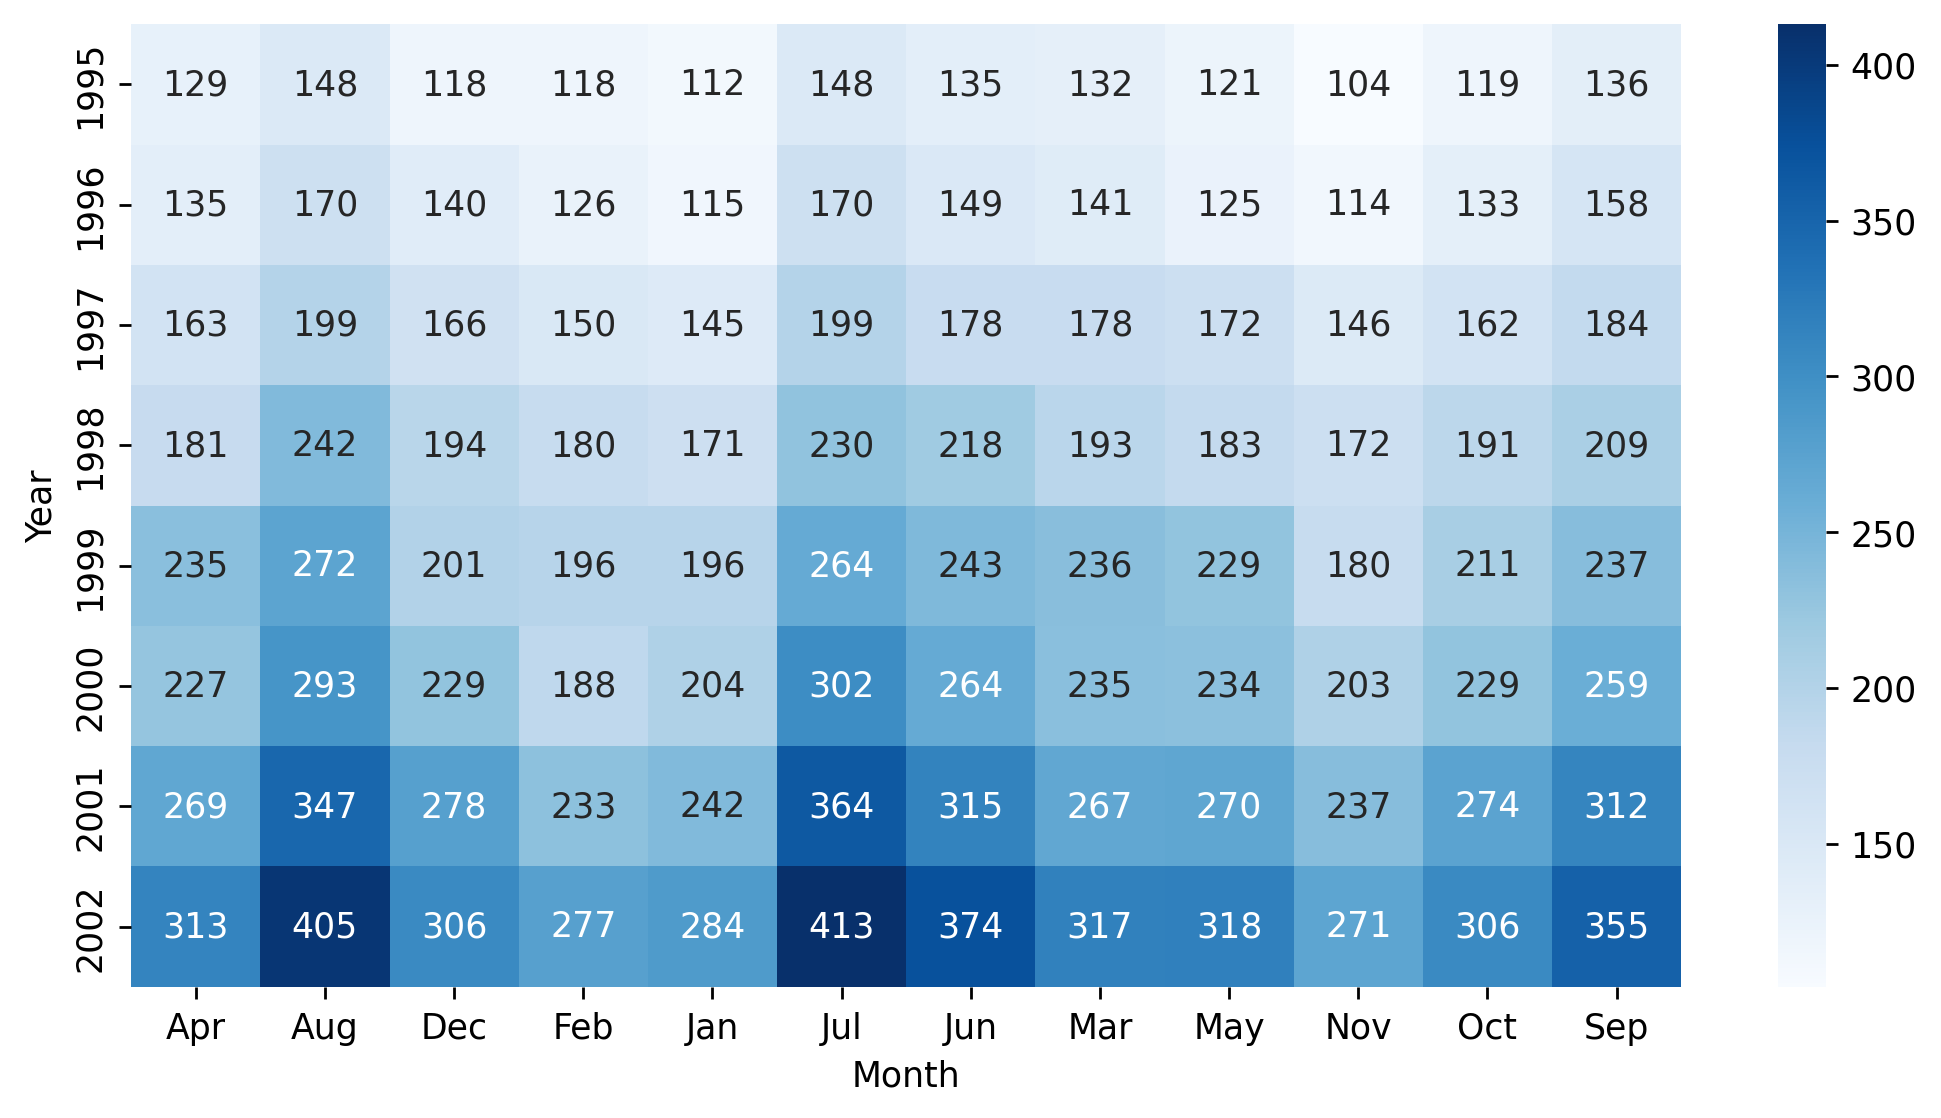

In [13]:
df_heatmap = pd.pivot_table(data = df, values = 'Passengers', index = 'Year', columns= 'Month', aggfunc = 'mean', fill_value = 0)
plt.figure(figsize = (10,5), dpi = 250)
sns.heatmap(df_heatmap, annot = True, cmap = 'Blues', fmt = 'g')

In [14]:
dummy = pd.get_dummies(df['Month'], prefix = '', prefix_sep = '')
dummy

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
df = pd.concat([df, dummy], axis = 1)
df

,Date,Passengers,t,log_passengers,t_square,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1,4.718499,1,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4.770685,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,4.882802,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,4.859812,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,4.795791,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,6.003887,8464,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,5.872118,8649,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,5.723585,8836,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,5.602119,9025,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace = True)
df

,Date,Passengers,t,log_passengers,t_square,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,,,,,
1995-01-01,1995-01-01,112,1,4.718499,1,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1995-02-01,1995-02-01,118,2,4.770685,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
1995-03-01,1995-03-01,132,3,4.882802,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
1995-04-01,1995-04-01,129,4,4.859812,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
1995-05-01,1995-05-01,121,5,4.795791,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,2002-08-01,405,92,6.003887,8464,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
2002-09-01,2002-09-01,355,93,5.872118,8649,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
2002-10-01,2002-10-01,306,94,5.723585,8836,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
df.drop(columns = ['Date'], axis = 1, inplace = True)
df

,Passengers,t,log_passengers,t_square,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,,,,
1995-01-01,112,1,4.718499,1,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1995-02-01,118,2,4.770685,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
1995-03-01,132,3,4.882802,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
1995-04-01,129,4,4.859812,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
1995-05-01,121,5,4.795791,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,92,6.003887,8464,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
2002-09-01,355,93,5.872118,8649,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
2002-10-01,306,94,5.723585,8836,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [18]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [19]:
# Boxplot

<Axes: >

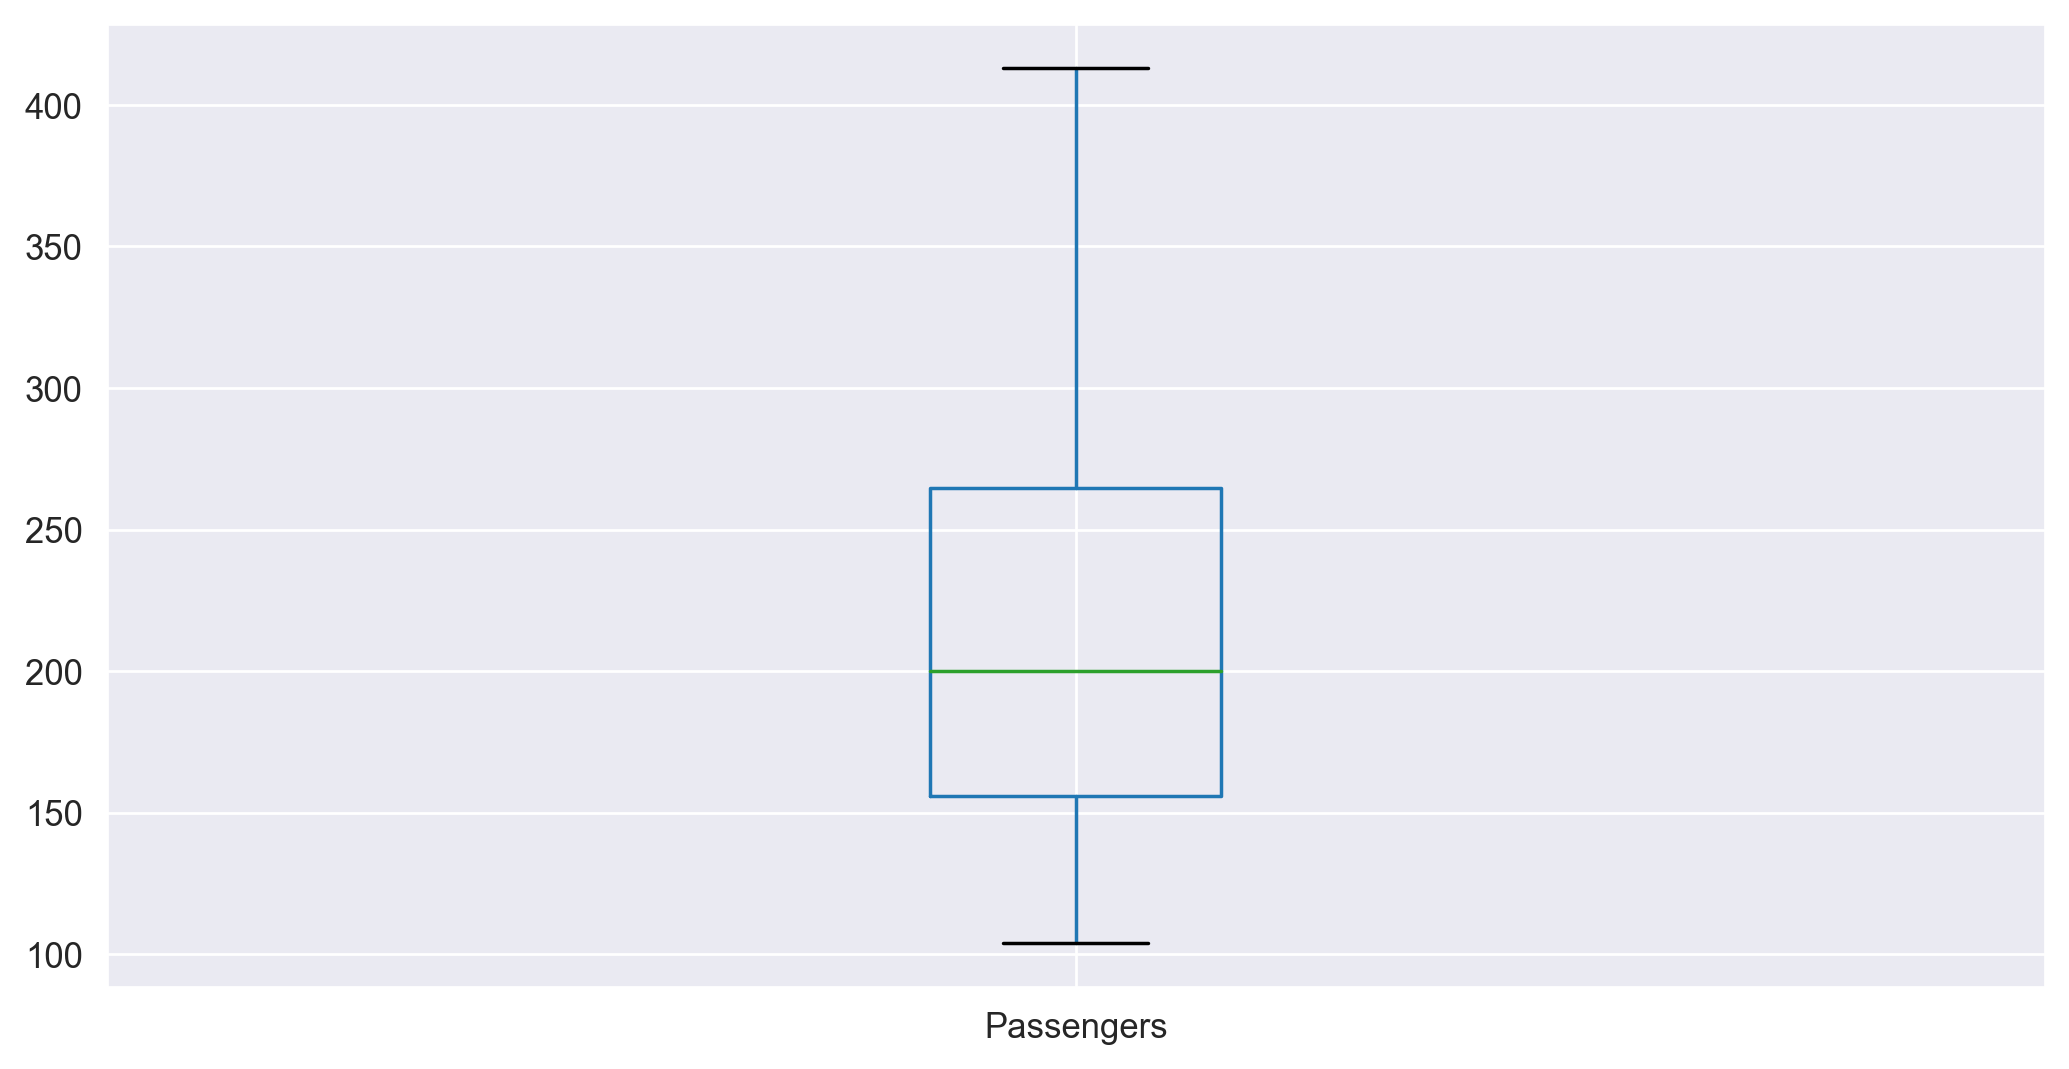

In [20]:
df[['Passengers']].boxplot()

In [21]:
# Histogram

Text(0.5, 1.0, 'Log_passengers')

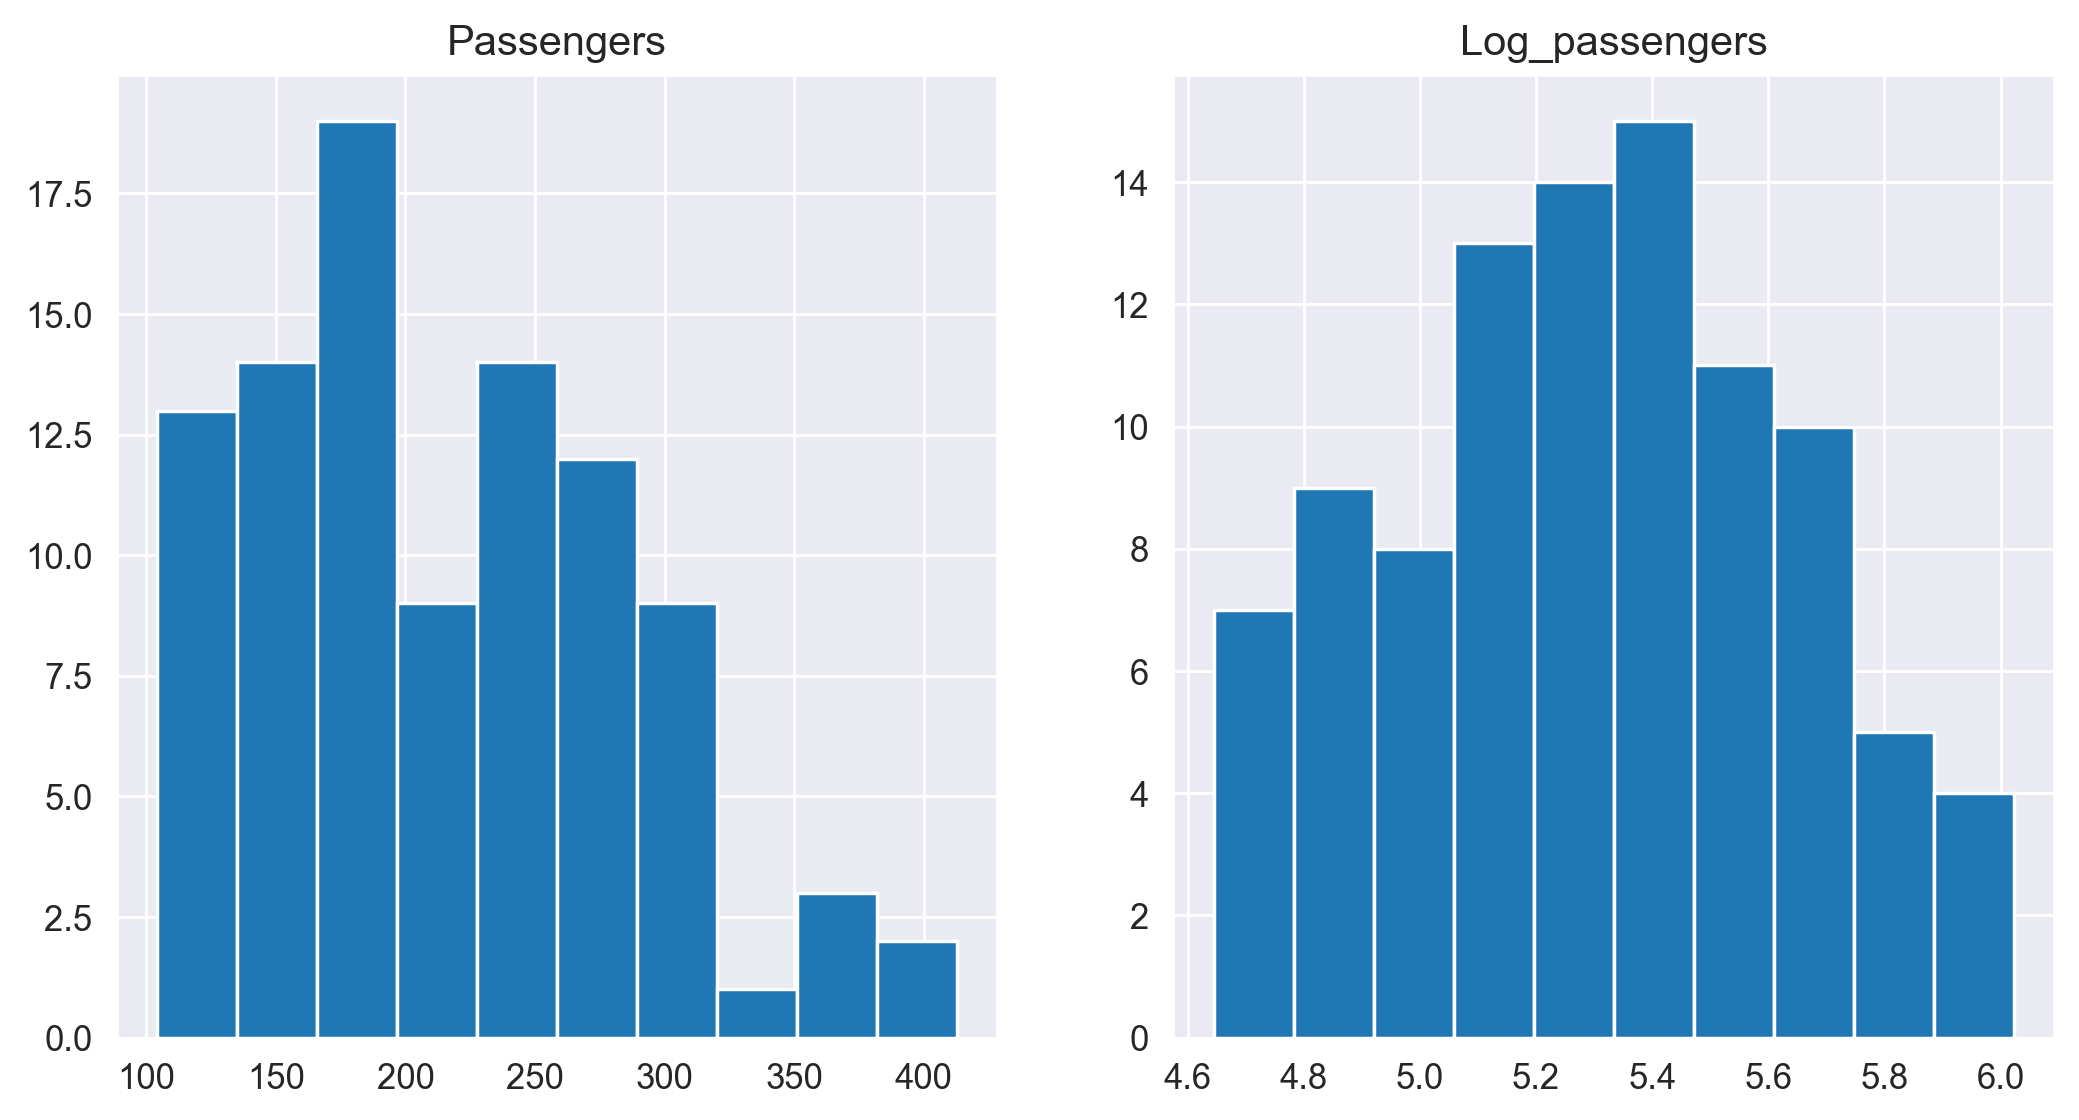

In [22]:
plt.subplot(121)
plt.hist(df['Passengers'])
plt.title('Passengers')

plt.subplot(122)
plt.hist(df['log_passengers'])
plt.title('Log_passengers')

In [23]:
# Kde plot

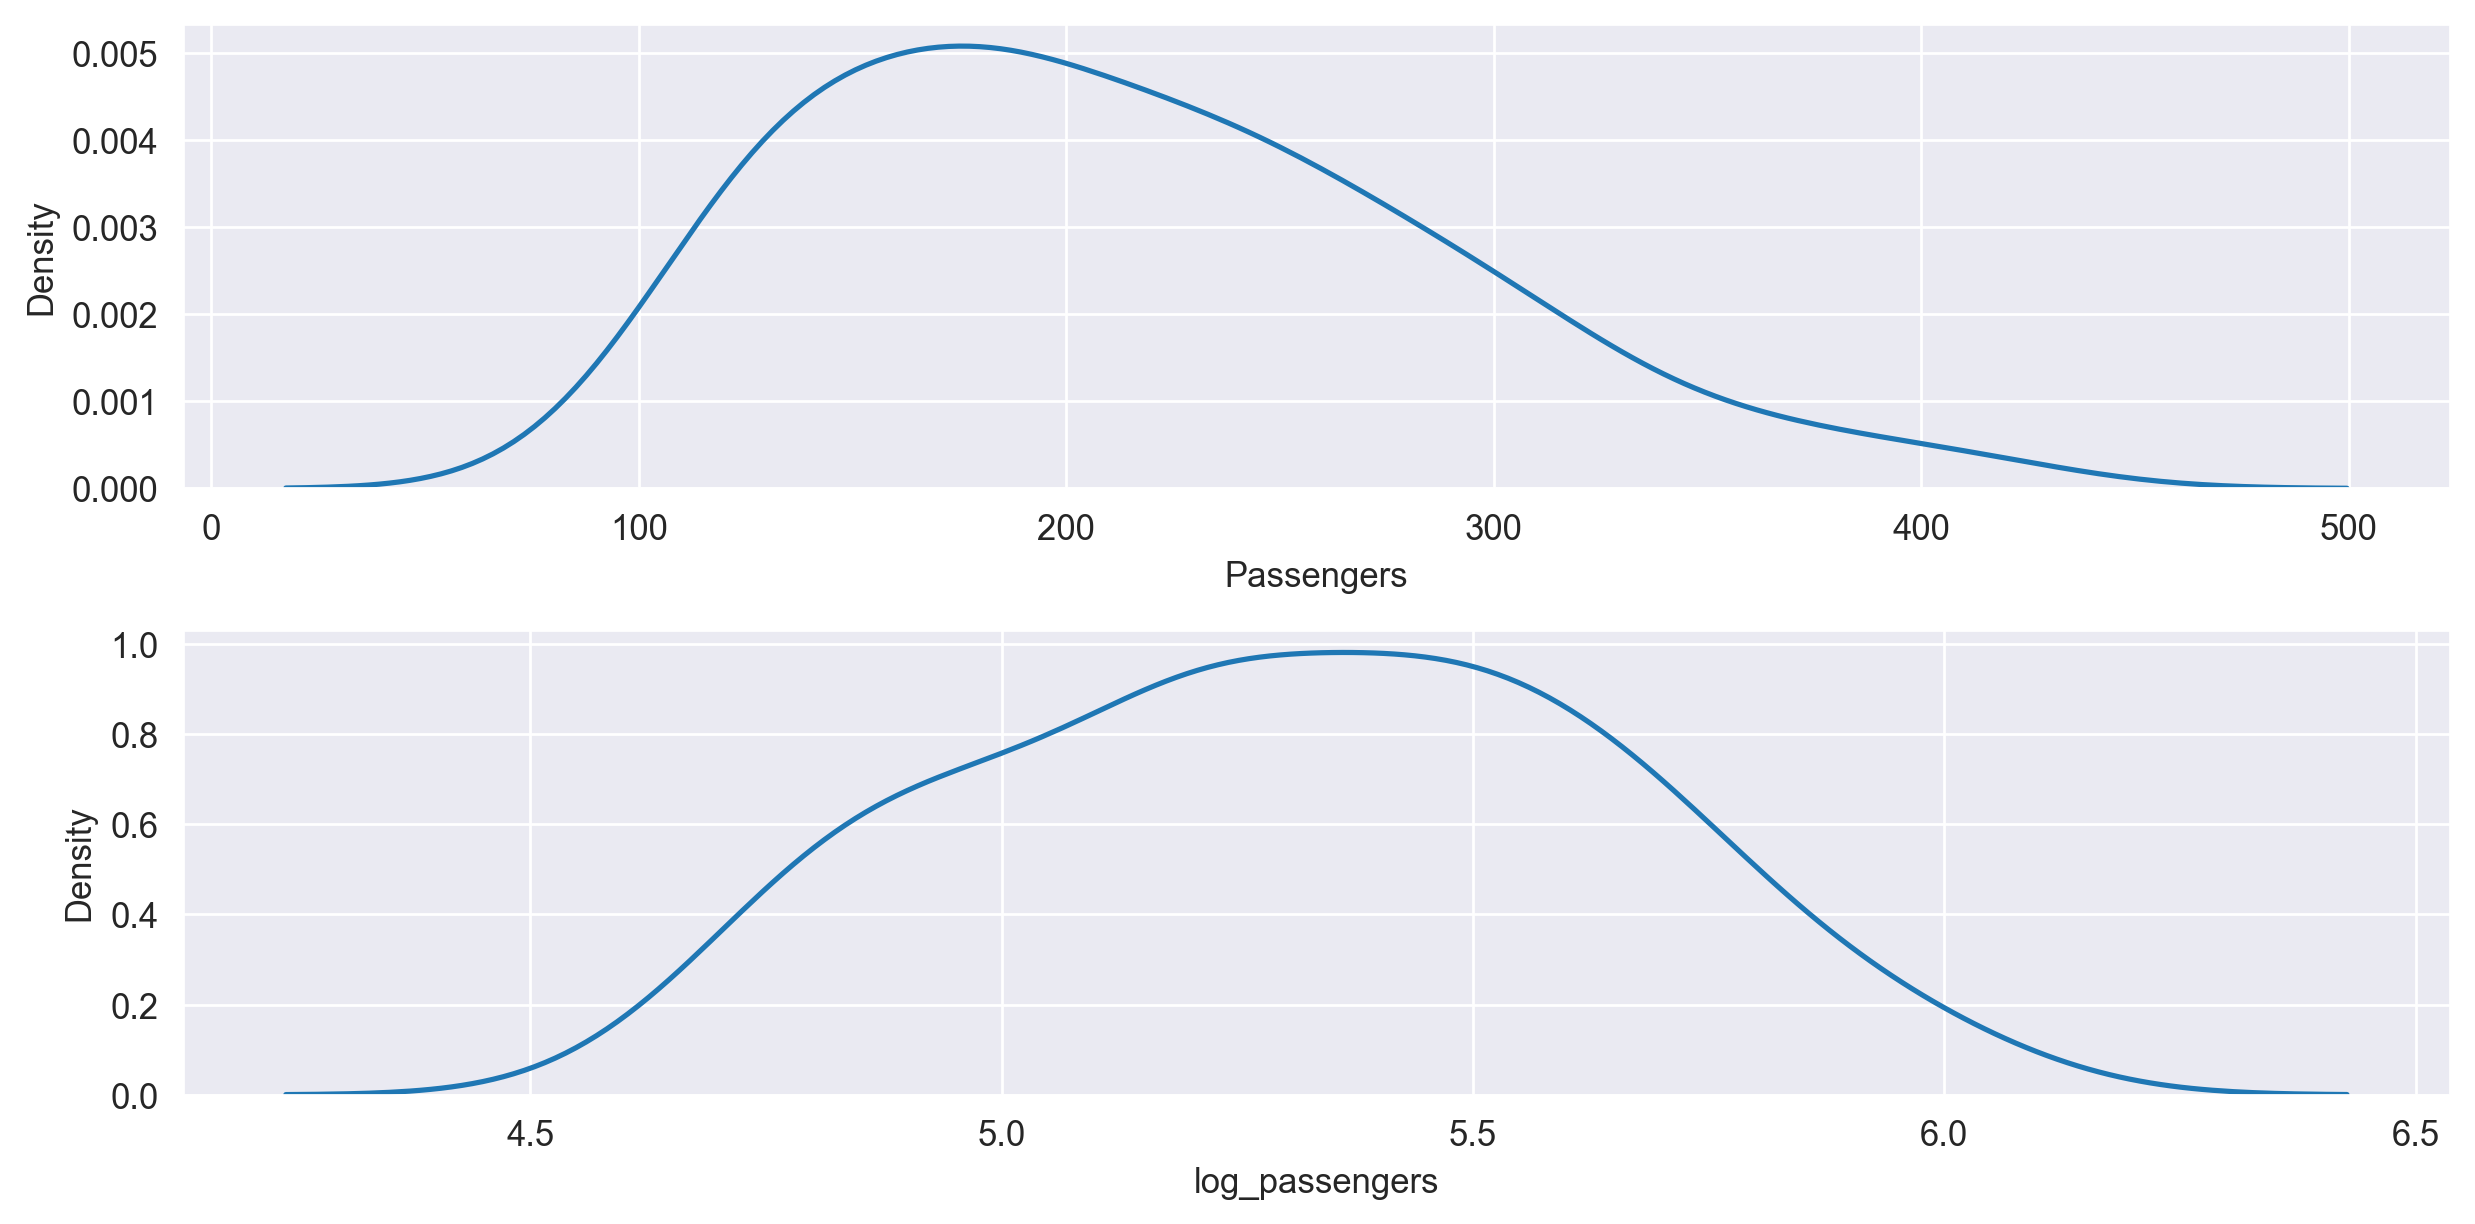

In [24]:
plt.subplot(211)
sns.kdeplot(df['Passengers'])

plt.subplot(212)
sns.kdeplot(df['log_passengers'])
plt.tight_layout()

<Axes: xlabel='Month', ylabel='Passengers'>

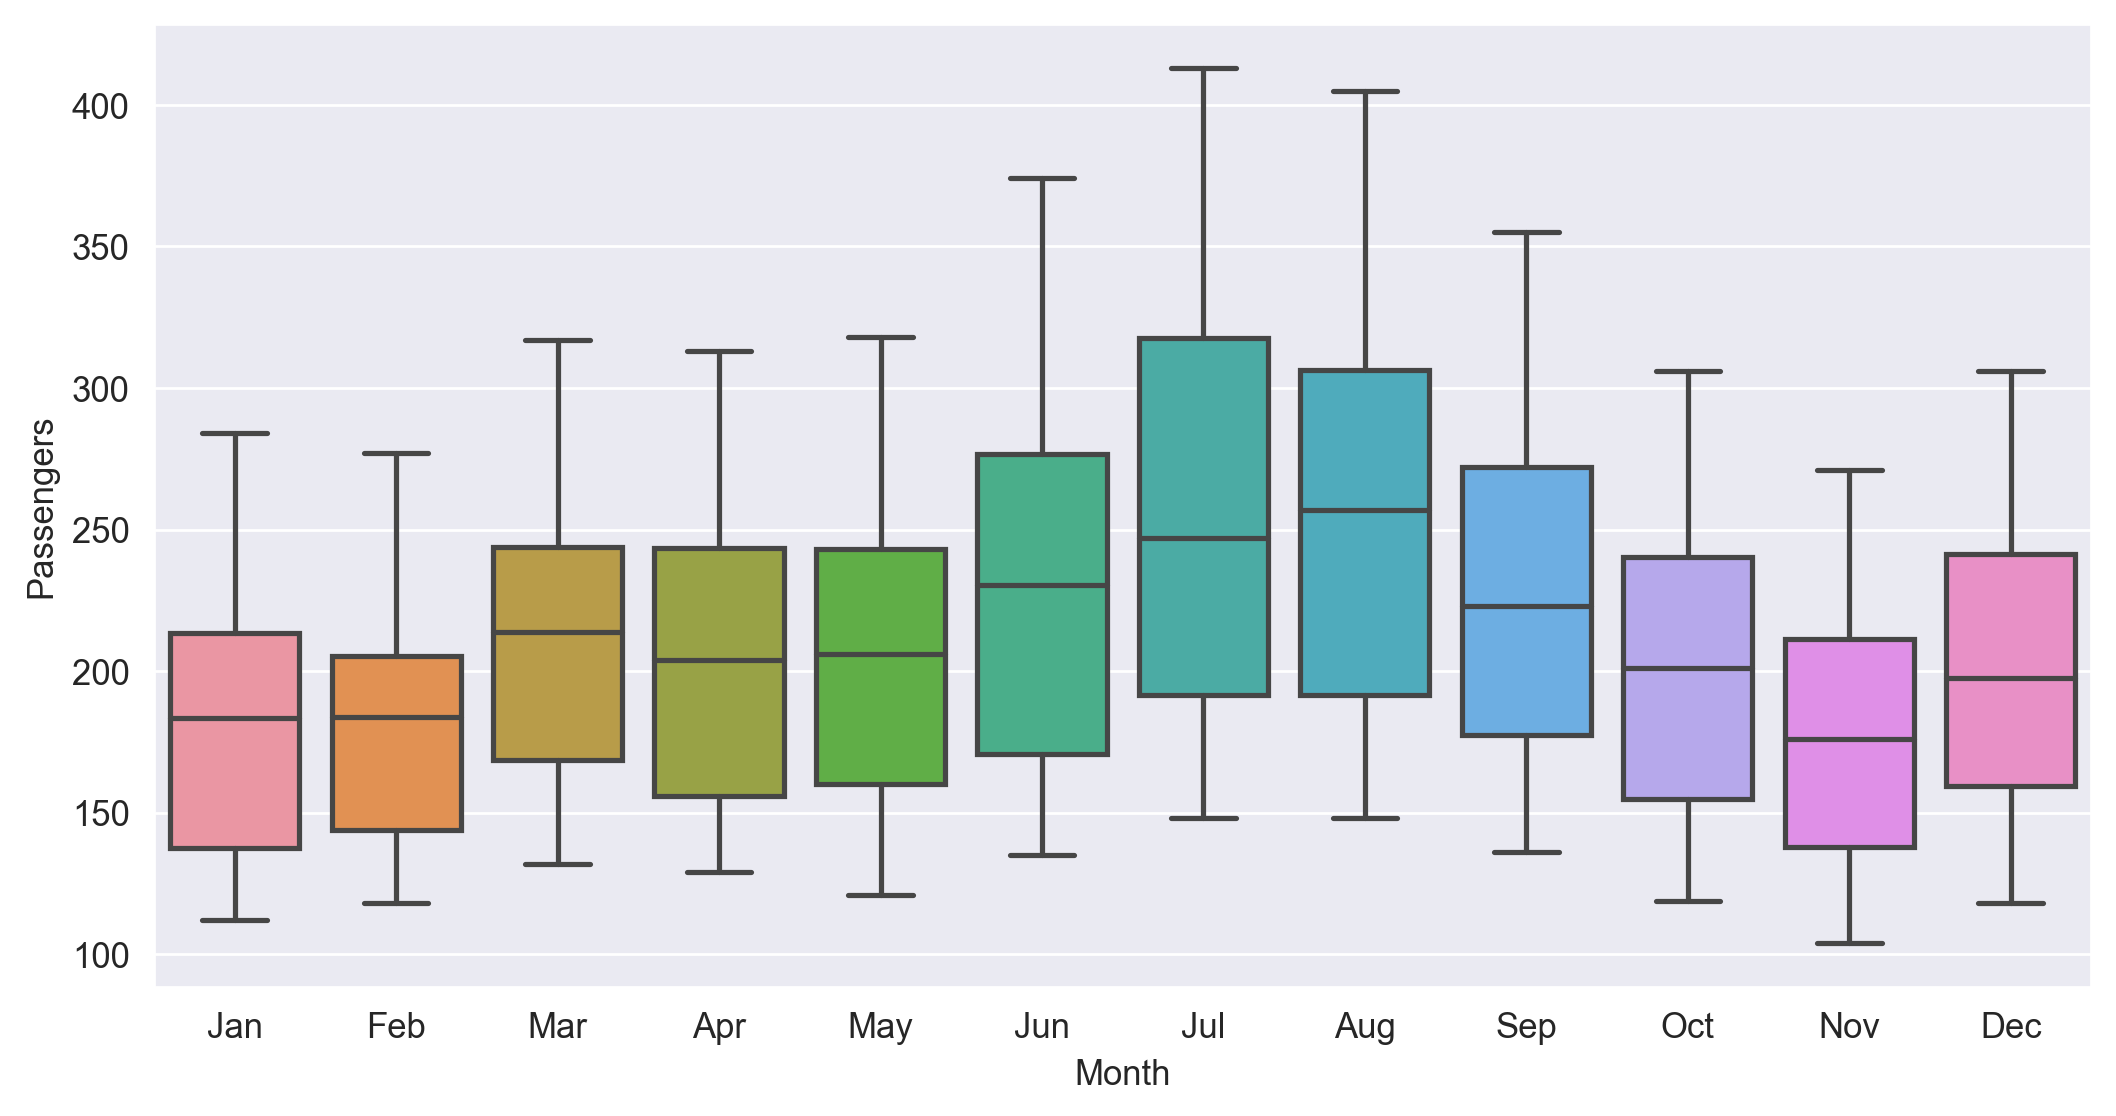

In [25]:
sns.boxplot(x = 'Month', y = 'Passengers', data = df)

<Axes: xlabel='Year', ylabel='Passengers'>

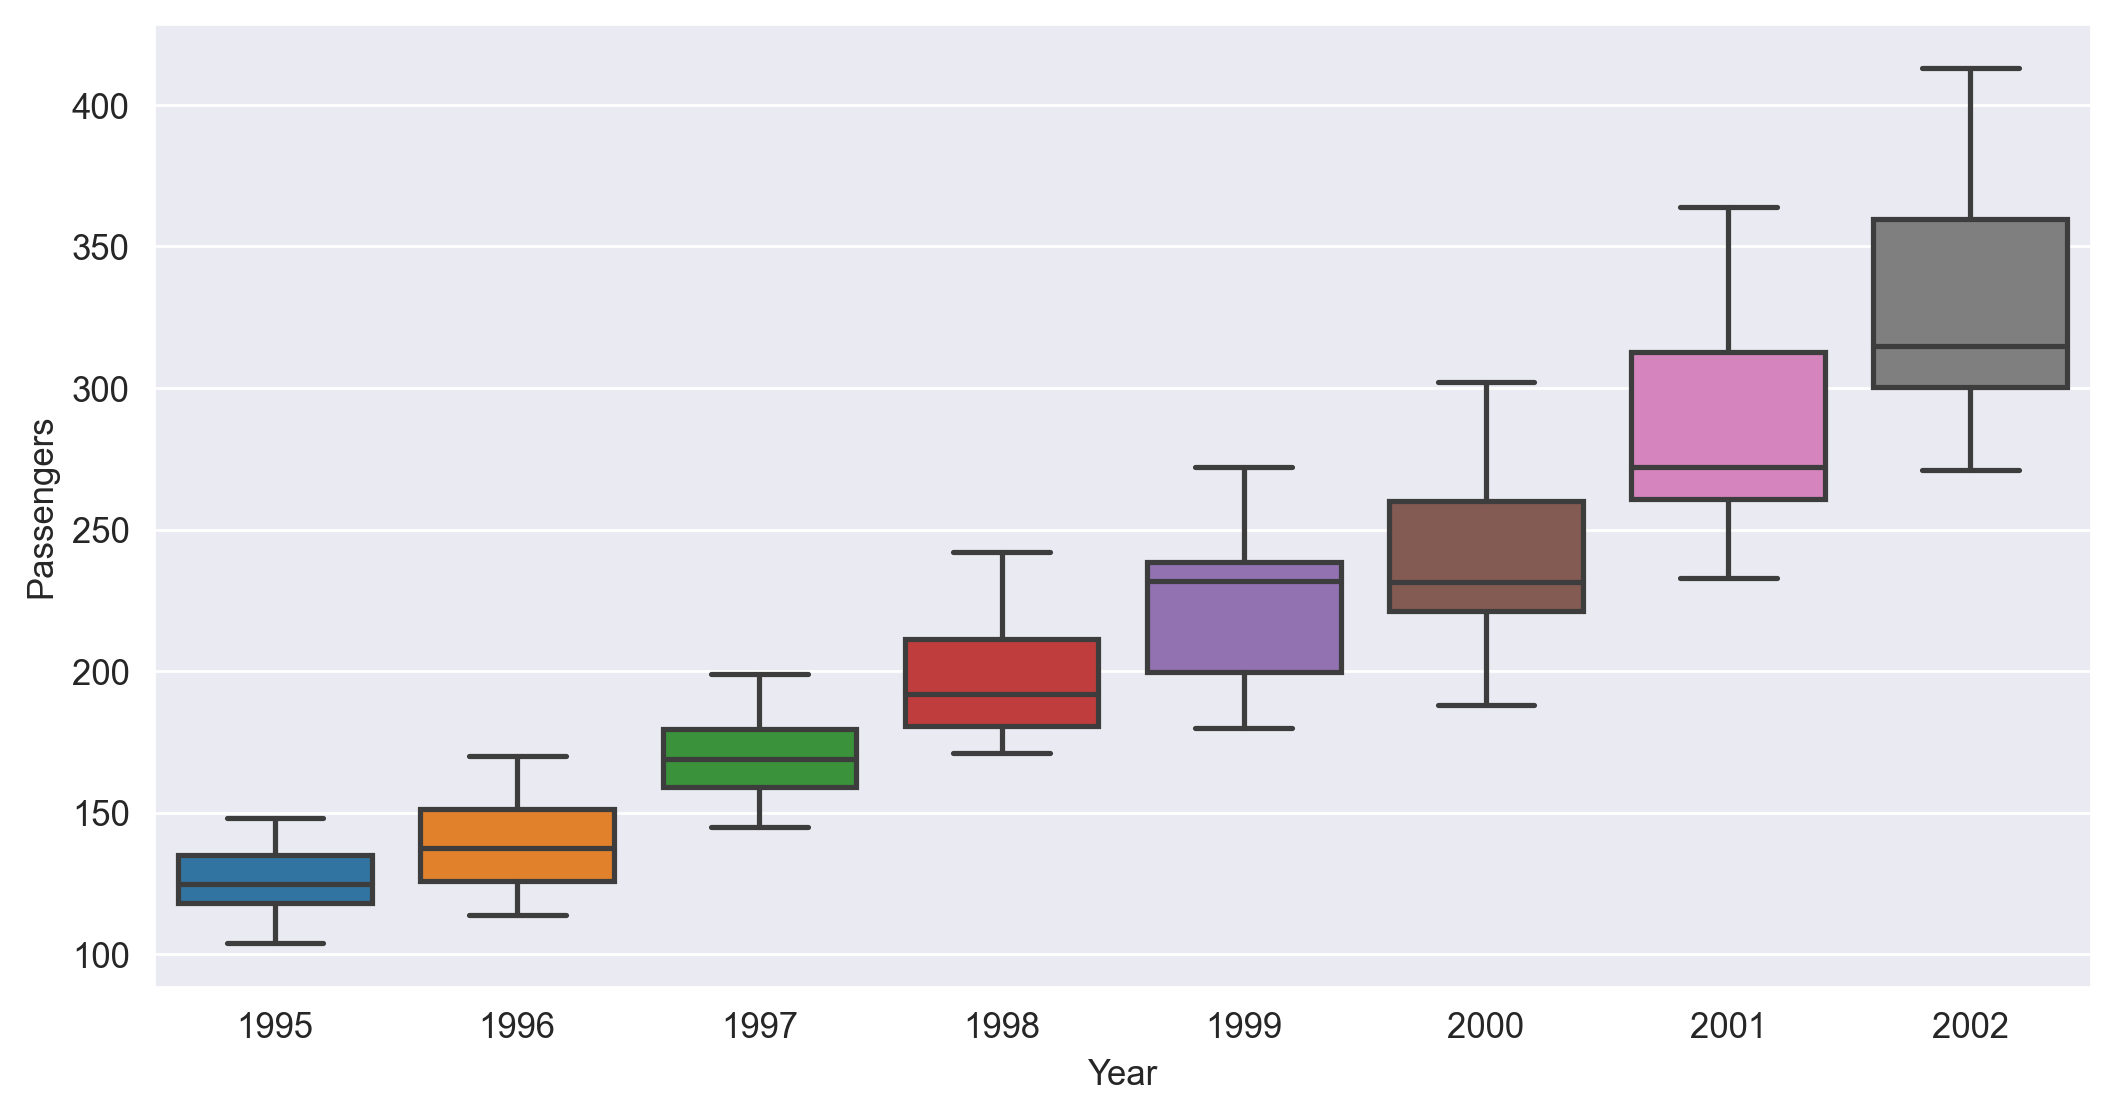

In [26]:
sns.boxplot(x = 'Year', y = 'Passengers', data = df)

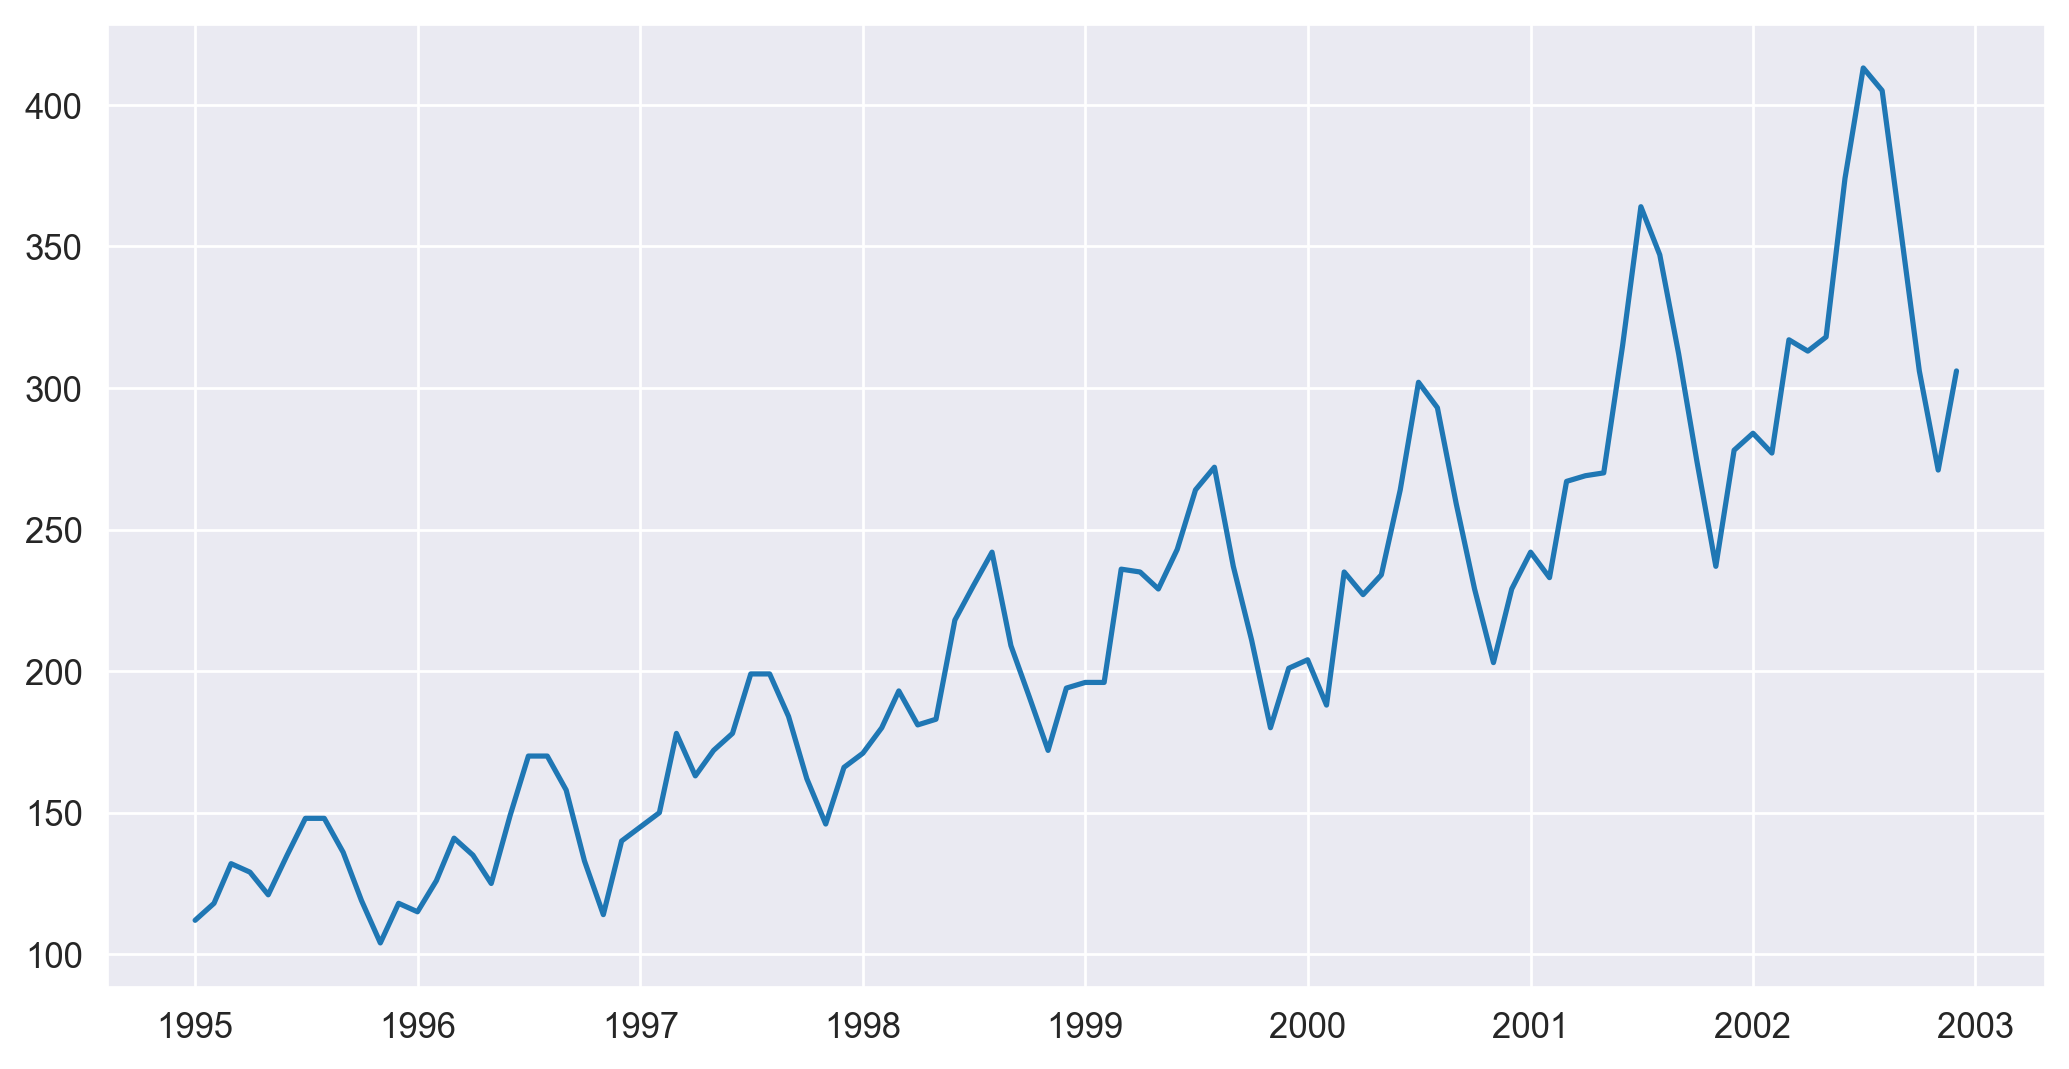

In [27]:
plt.plot(df['Passengers'])

- Above data is not stationary

In [28]:
# Calculating first order differencing

In [29]:
df['First_order'] = df['Passengers'].diff(periods = 1)
df

,Passengers,t,log_passengers,t_square,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,First_order
Date,,,,,,,,,,,,,,,,,,,
1995-01-01,112,1,4.718499,1,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,NaN
1995-02-01,118,2,4.770685,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,6.0
1995-03-01,132,3,4.882802,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,14.0
1995-04-01,129,4,4.859812,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,-3.0
1995-05-01,121,5,4.795791,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,92,6.003887,8464,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,-8.0
2002-09-01,355,93,5.872118,8649,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,-50.0
2002-10-01,306,94,5.723585,8836,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,-49.0


In [30]:
df.dropna(inplace = True)
df

,Passengers,t,log_passengers,t_square,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,First_order
Date,,,,,,,,,,,,,,,,,,,
1995-02-01,118,2,4.770685,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,6.0
1995-03-01,132,3,4.882802,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,14.0
1995-04-01,129,4,4.859812,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,-3.0
1995-05-01,121,5,4.795791,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,-8.0
1995-06-01,135,6,4.905275,36,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,92,6.003887,8464,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,-8.0
2002-09-01,355,93,5.872118,8649,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,-50.0
2002-10-01,306,94,5.723585,8836,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,-49.0


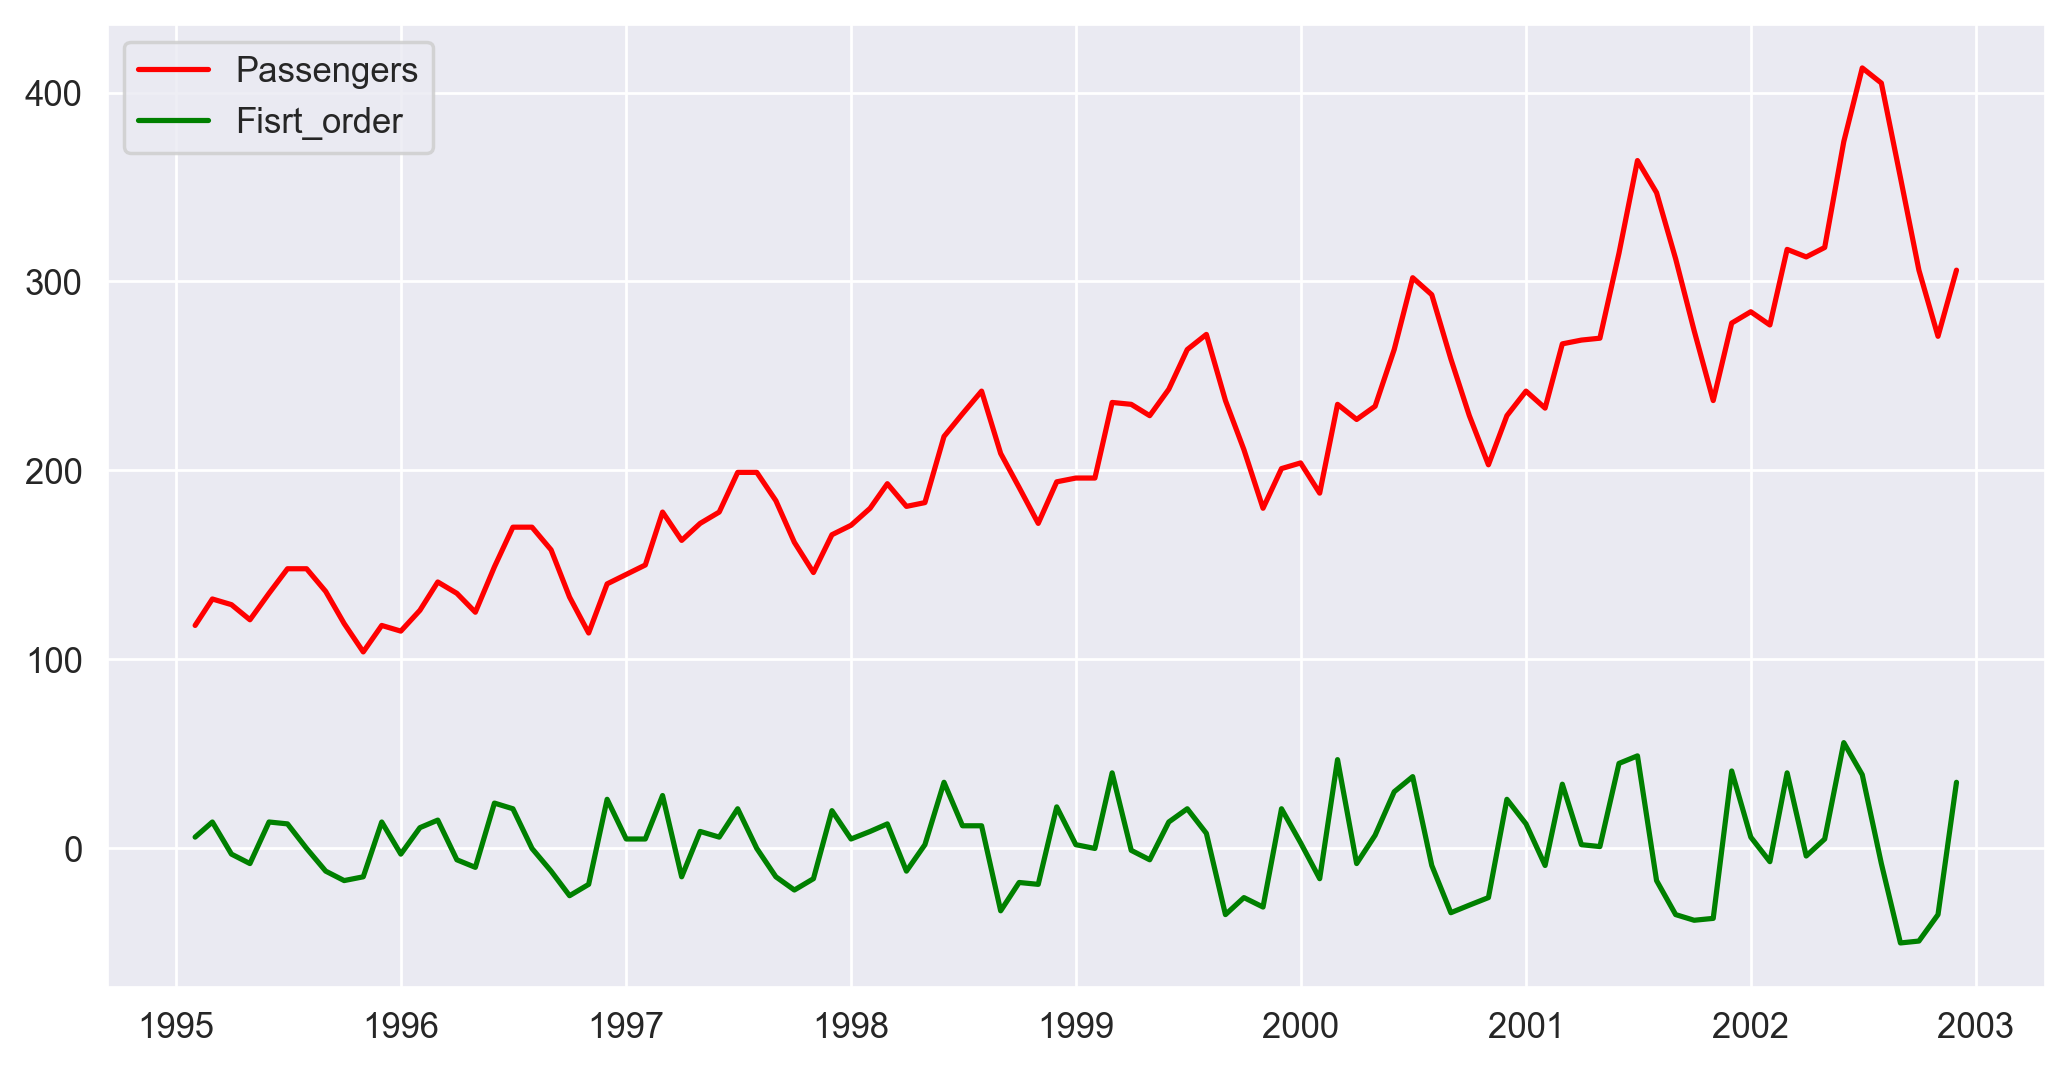

In [31]:
plt.plot(df['Passengers'], c = 'r', label = 'Passengers')
plt.plot(df['First_order'], c = 'g', label = 'Fisrt_order')
plt.legend()

In [32]:
# Autocorrelation

In [33]:
acf_values = acf(df['First_order'])
acf_values

array([ 1.        ,  0.24719303, -0.15621114, -0.19389898, -0.30091356,
       -0.07659995,  0.04937987, -0.11186081, -0.28940231, -0.12796419,
       -0.14189709,  0.23091956,  0.76784132,  0.2018499 , -0.14879414,
       -0.13854633, -0.23255484, -0.03403639,  0.00806283, -0.09009974])

In [34]:
# Plot acf

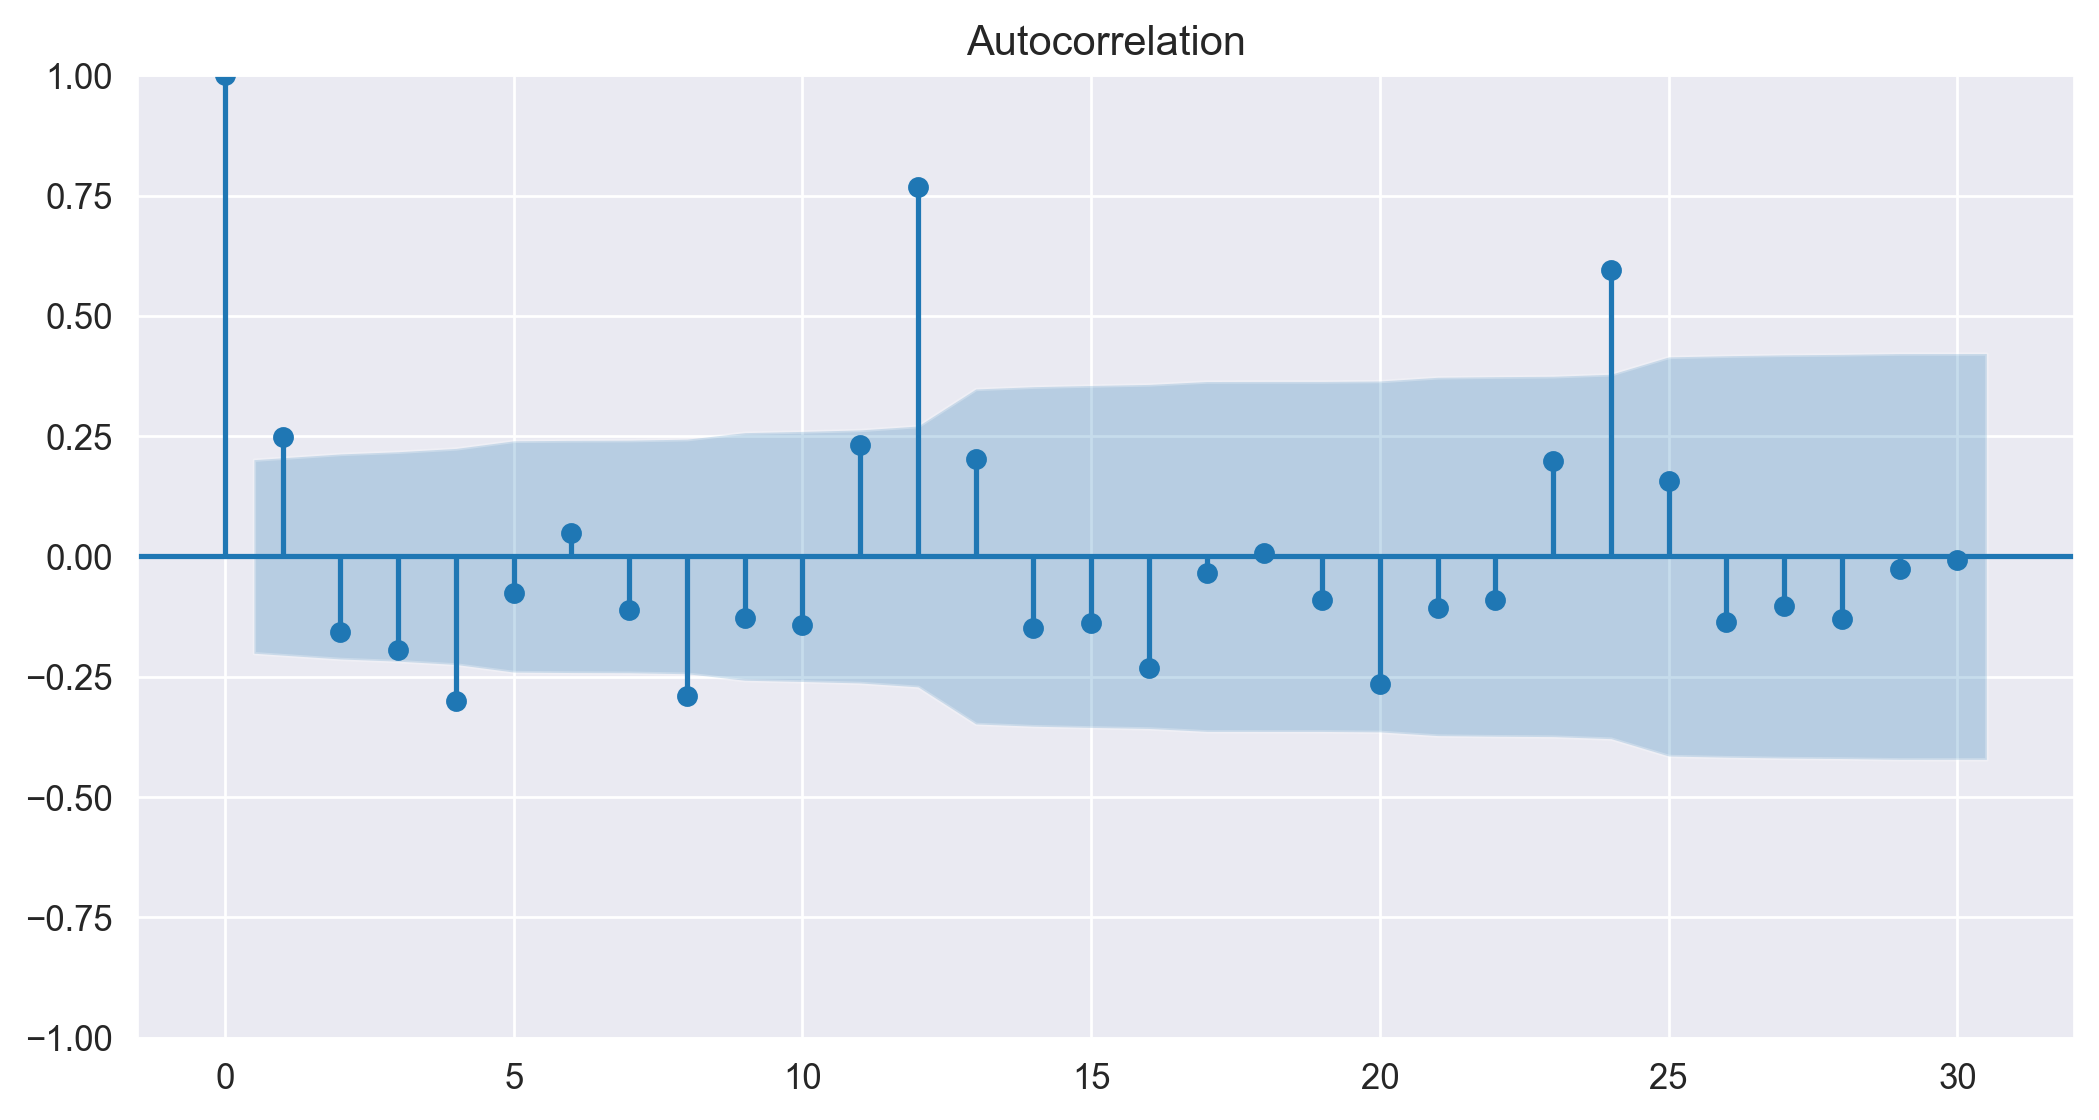

In [35]:
plot_acf(df['First_order'], lags = 30);

In [36]:
# Calculating pacf

In [37]:
pacf_values = pacf(df['First_order'])
pacf_values

array([ 1.00000000e+00,  2.49822741e-01, -2.36758342e-01, -1.03692905e-01,
       -3.01485928e-01,  2.23374632e-02, -8.40227411e-02, -2.53404035e-01,
       -4.46435582e-01, -2.23664740e-01, -6.53266123e-01, -3.65821471e-01,
        5.90496055e-01, -1.20748181e-01, -2.79572058e-01,  2.59046851e-01,
        4.43131573e-04, -1.03548748e-01, -2.89705180e-01,  3.92893315e-01])

In [38]:
# Plot pacf

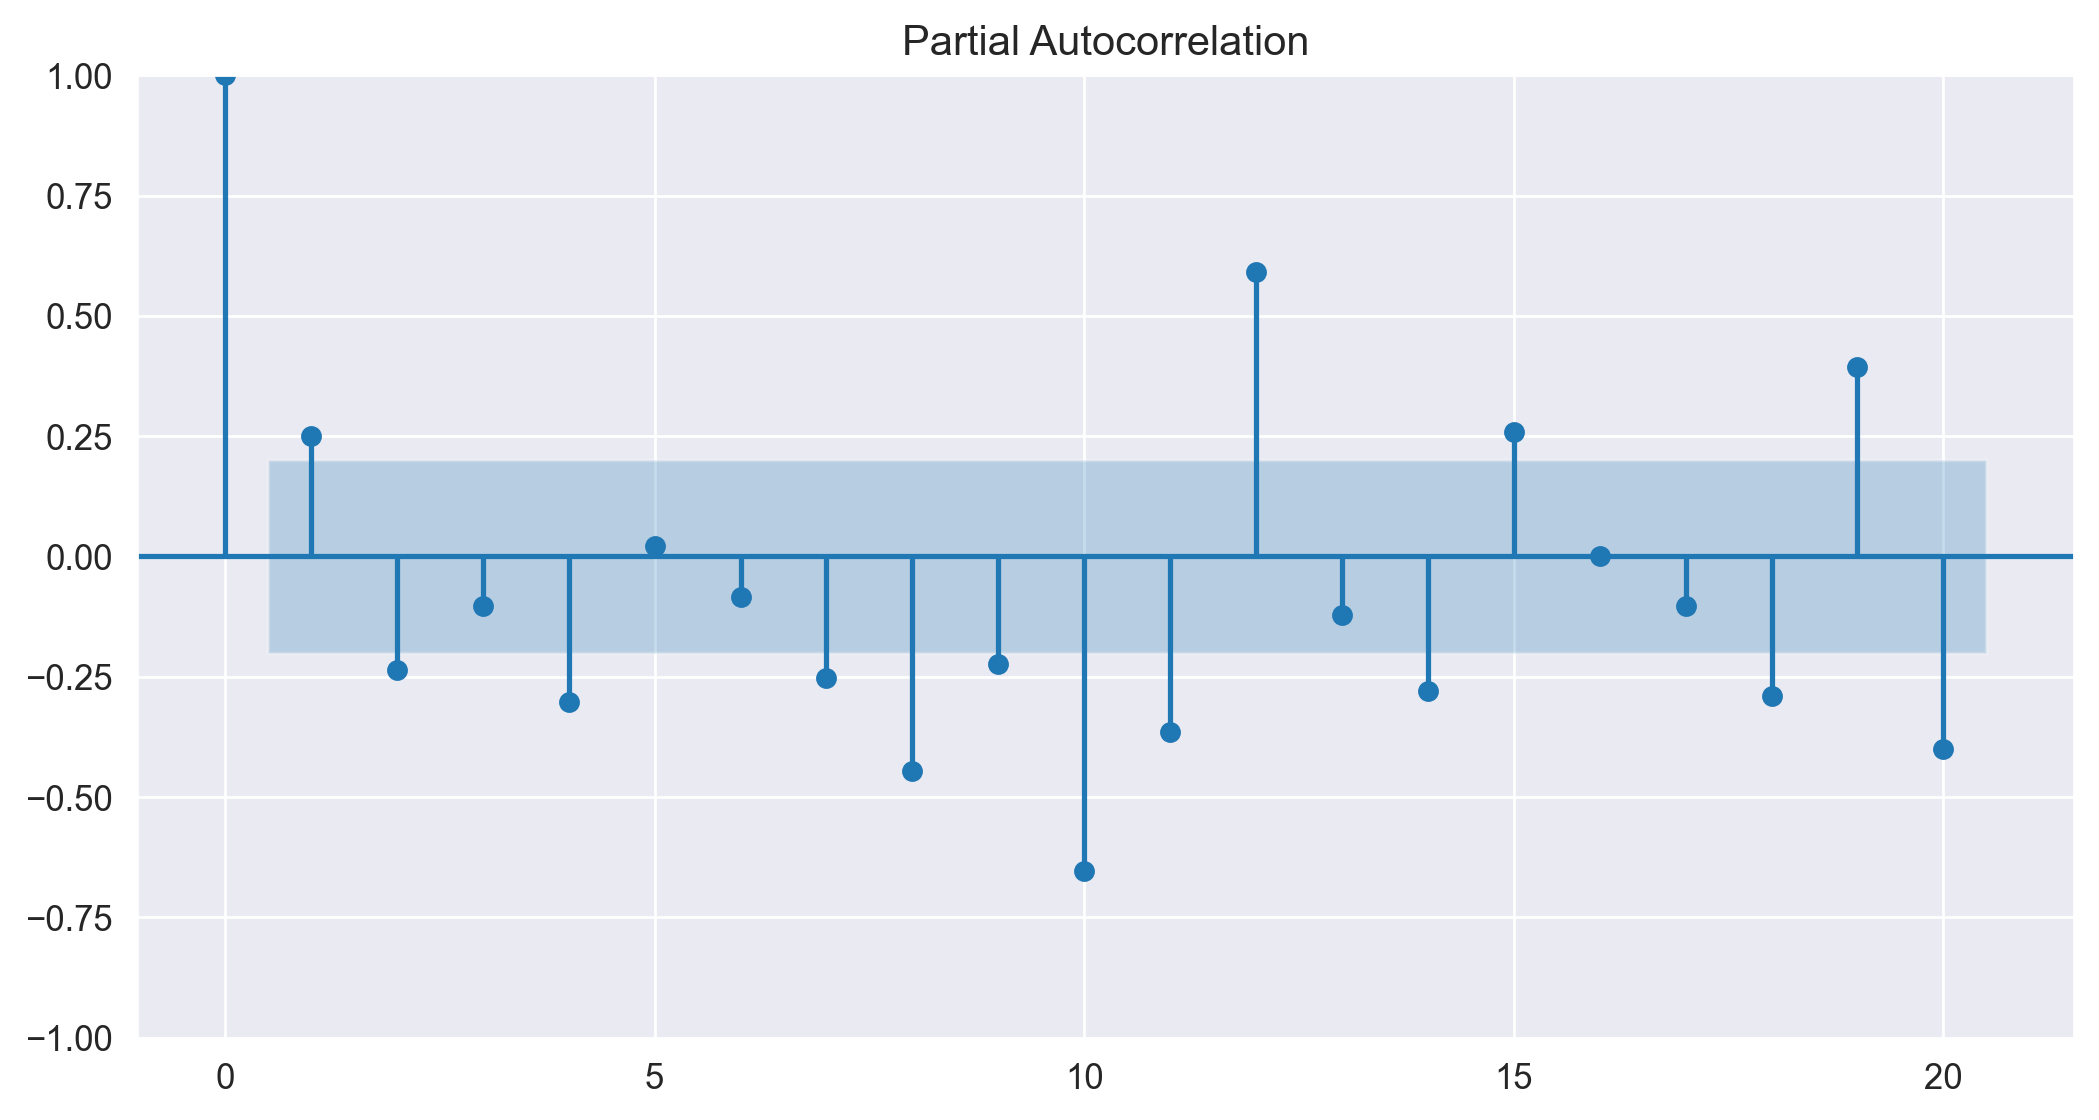

In [39]:
plot_pacf(df['First_order'], lags = 20);

In [40]:
# Time series decomposition plot

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

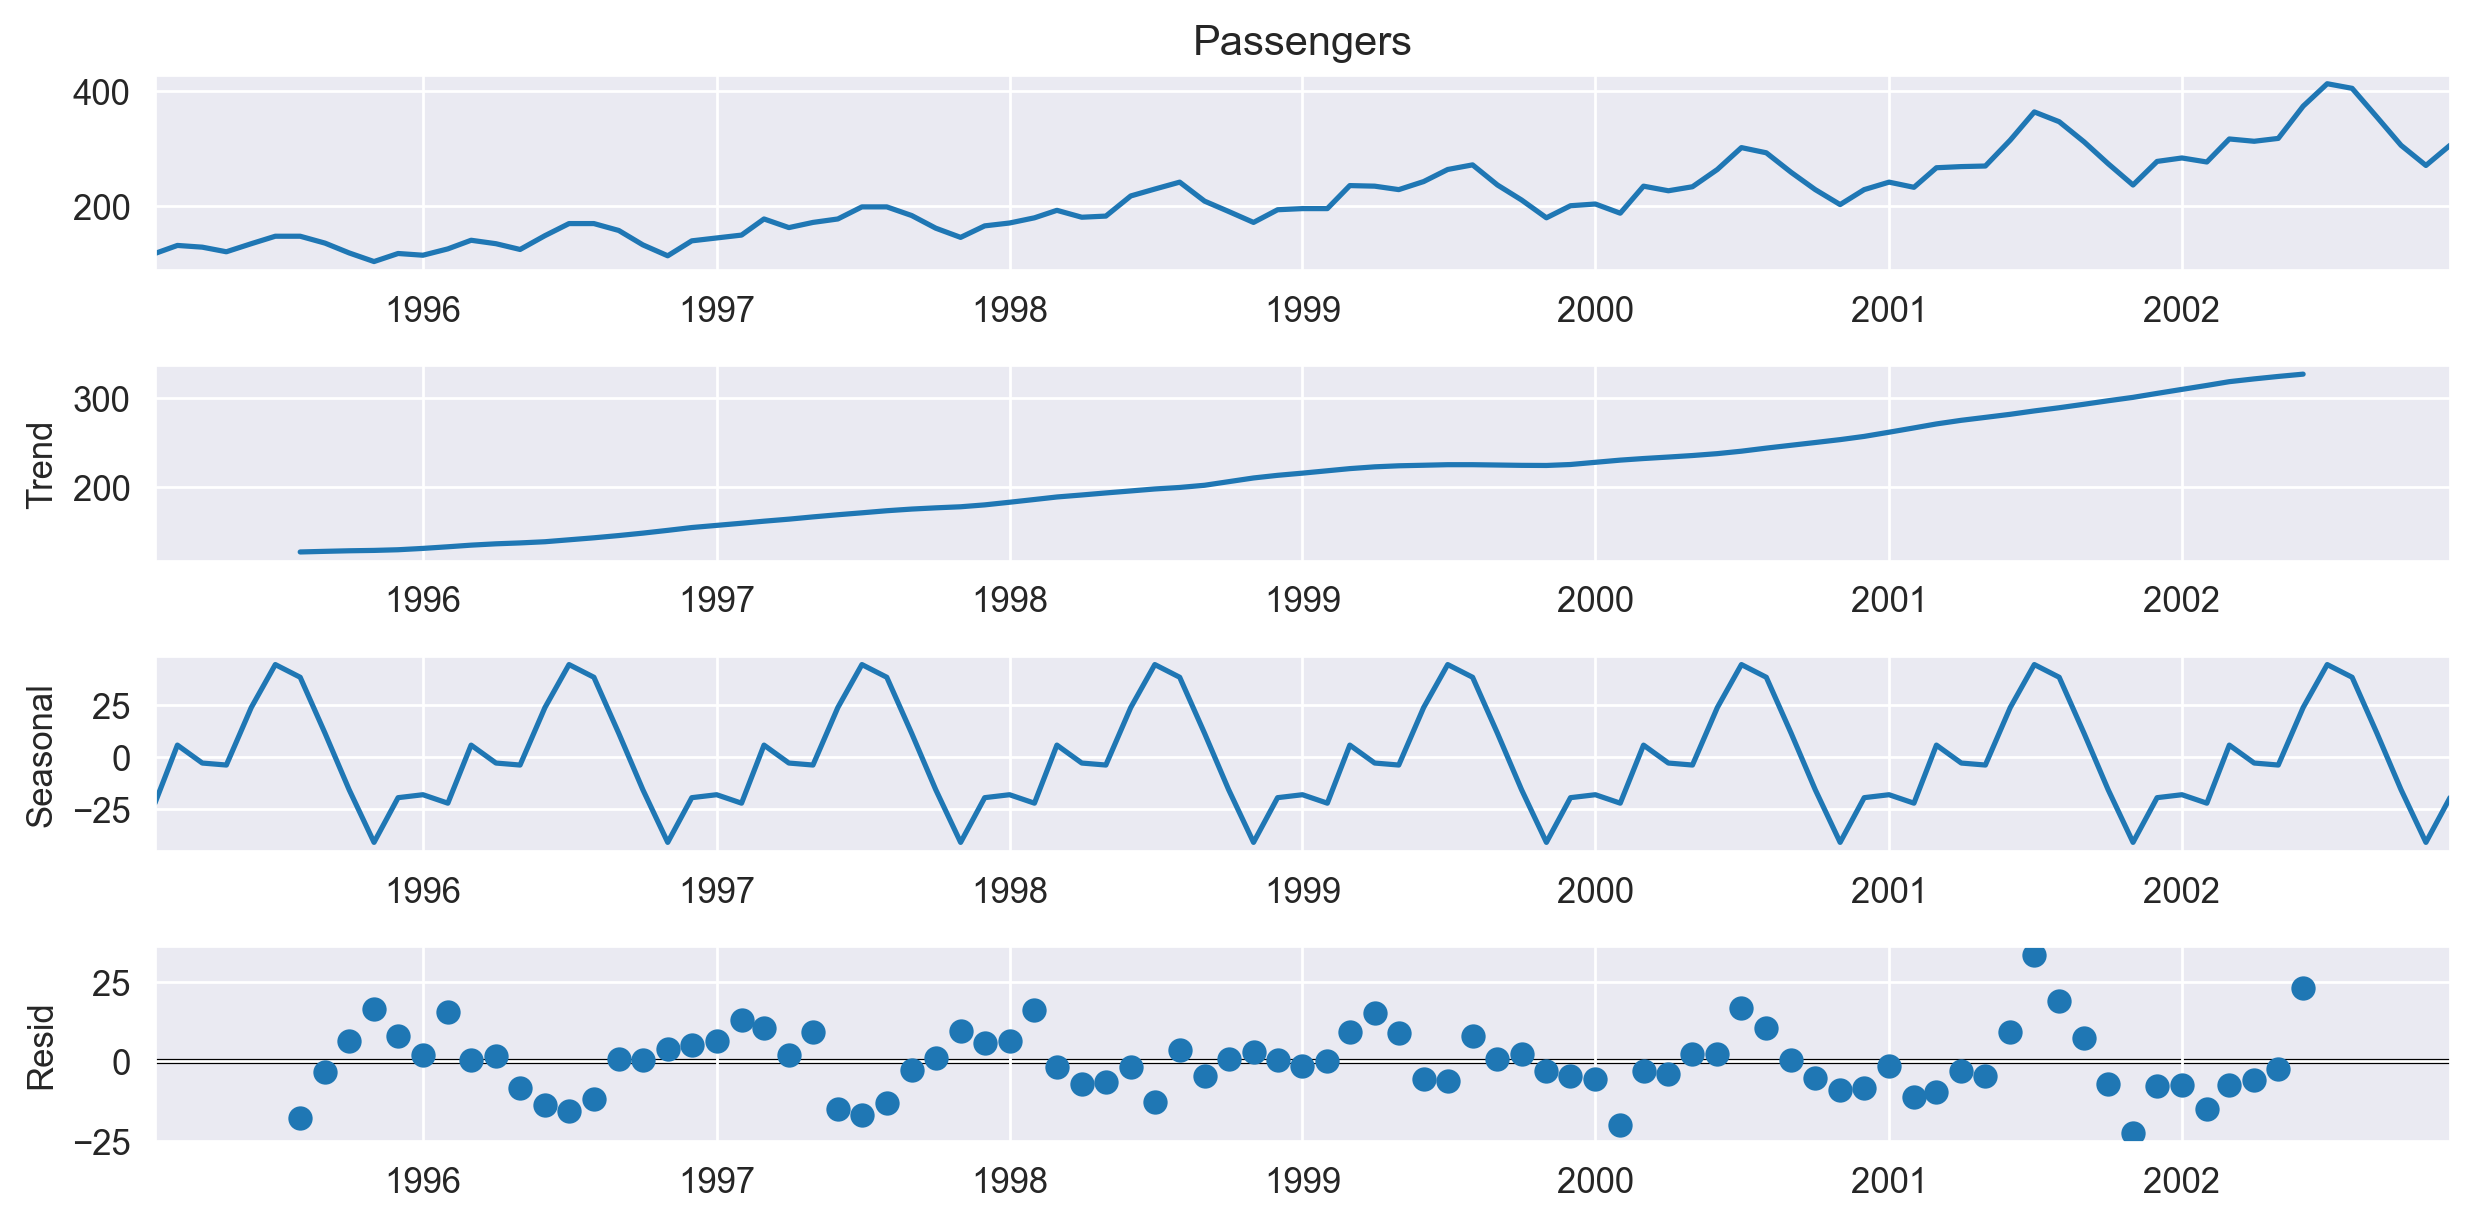

In [42]:
decompose_ts = seasonal_decompose(df['Passengers'], period = 12)
decompose_ts.plot();

In [43]:
# Data splitting

In [44]:
train = df.head(83)
test = df.tail(12)

In [45]:
train

,Passengers,t,log_passengers,t_square,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,First_order
Date,,,,,,,,,,,,,,,,,,,
1995-02-01,118,2,4.770685,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,6.0
1995-03-01,132,3,4.882802,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,14.0
1995-04-01,129,4,4.859812,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,-3.0
1995-05-01,121,5,4.795791,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,-8.0
1995-06-01,135,6,4.905275,36,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-08-01,347,80,5.849325,6400,Aug,2001,0,1,0,0,0,0,0,0,0,0,0,0,-17.0
2001-09-01,312,81,5.743003,6561,Sep,2001,0,0,0,0,0,0,0,0,0,0,0,1,-35.0
2001-10-01,274,82,5.613128,6724,Oct,2001,0,0,0,0,0,0,0,0,0,0,1,0,-38.0


In [46]:
test

,Passengers,t,log_passengers,t_square,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,First_order
Date,,,,,,,,,,,,,,,,,,,
2002-01-01,284,85,5.648974,7225,Jan,2002,0,0,0,0,1,0,0,0,0,0,0,0,6.0
2002-02-01,277,86,5.624018,7396,Feb,2002,0,0,0,1,0,0,0,0,0,0,0,0,-7.0
2002-03-01,317,87,5.758902,7569,Mar,2002,0,0,0,0,0,0,0,1,0,0,0,0,40.0
2002-04-01,313,88,5.746203,7744,Apr,2002,1,0,0,0,0,0,0,0,0,0,0,0,-4.0
2002-05-01,318,89,5.762051,7921,May,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.0
2002-06-01,374,90,5.924256,8100,Jun,2002,0,0,0,0,0,0,1,0,0,0,0,0,56.0
2002-07-01,413,91,6.023448,8281,Jul,2002,0,0,0,0,0,1,0,0,0,0,0,0,39.0
2002-08-01,405,92,6.003887,8464,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,-8.0
2002-09-01,355,93,5.872118,8649,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,-50.0


**Data Driven Methods:**

1) Moving average method

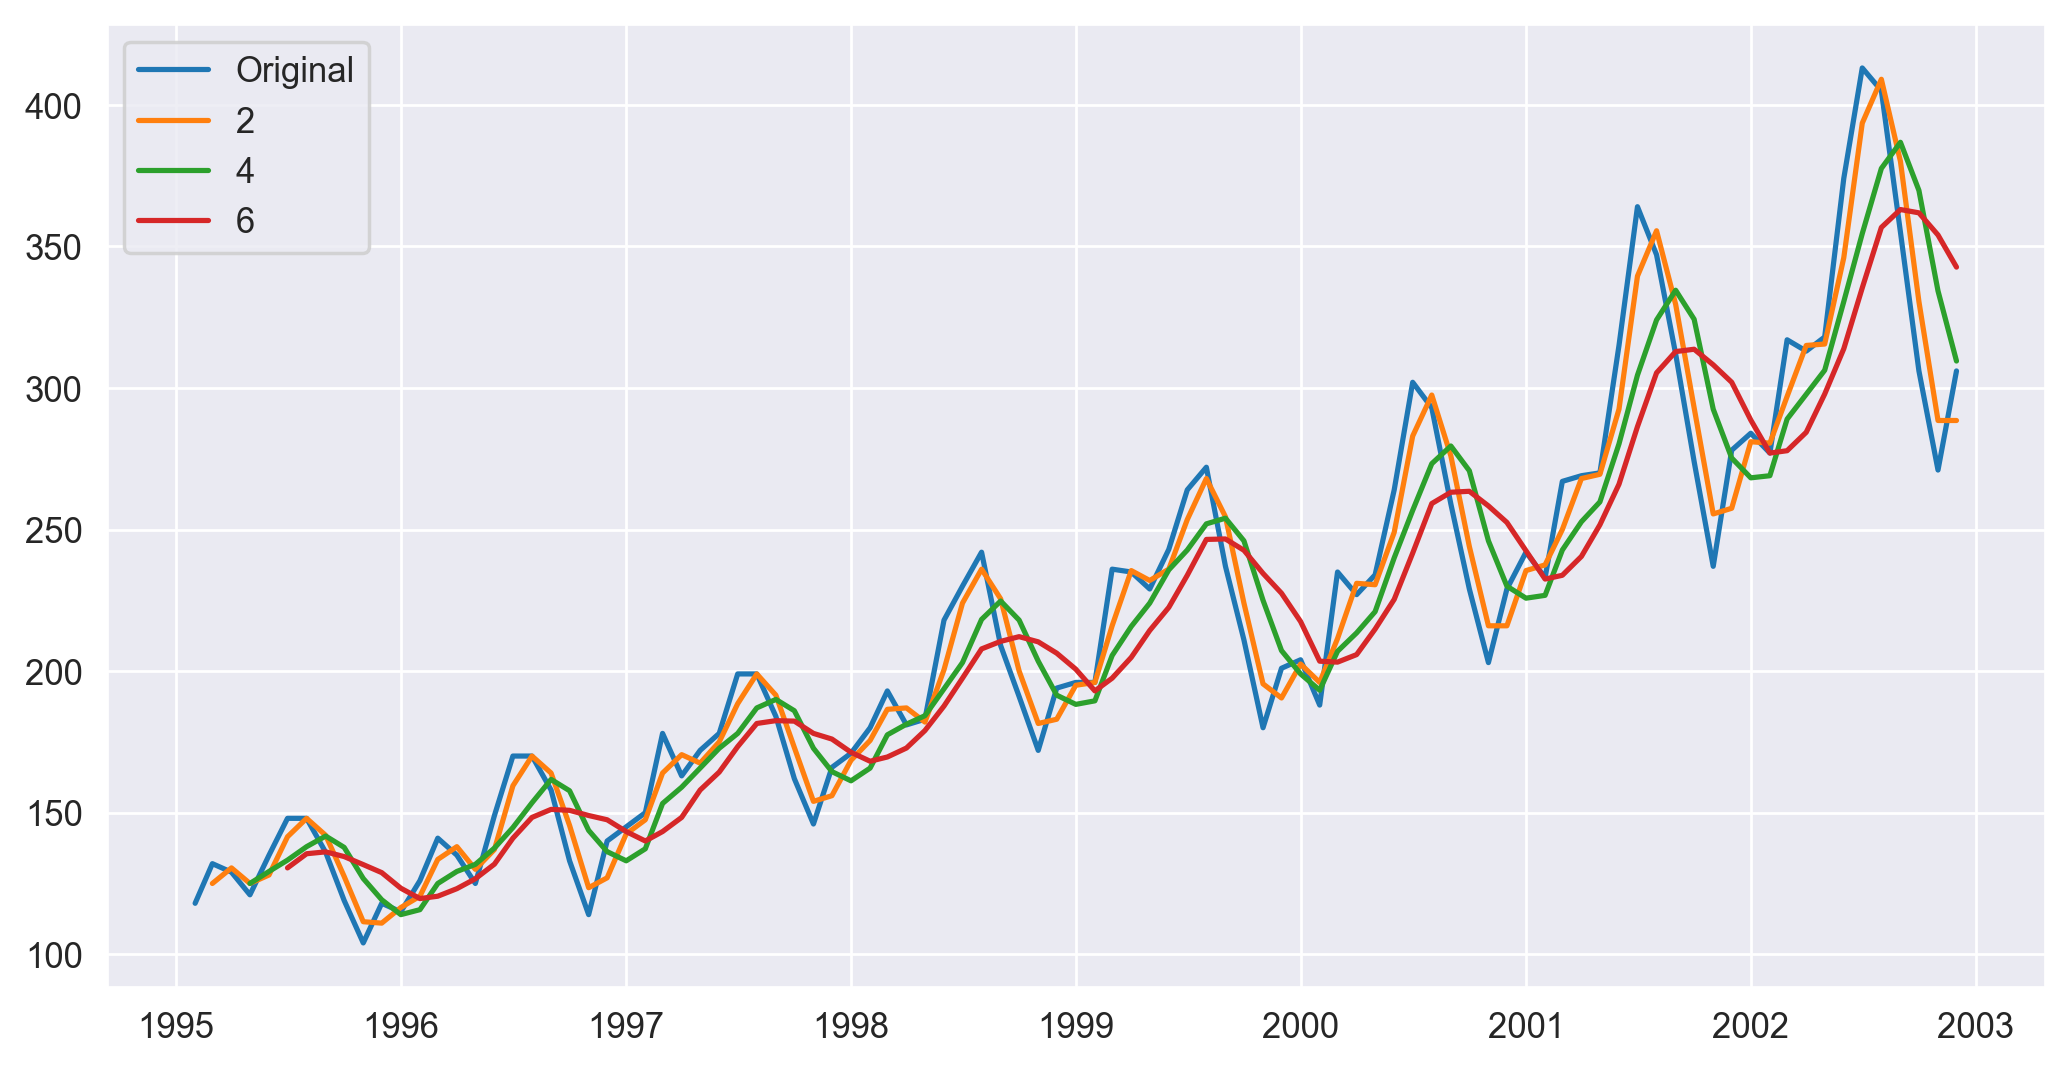

In [47]:
plt.plot(df['Passengers'], label = 'Original')
plt.plot(df['Passengers'].rolling(2).mean(), label = '2')
plt.plot(df['Passengers'].rolling(4).mean(), label = '4')
plt.plot(df['Passengers'].rolling(6).mean(), label = '6')
plt.legend()

2) Exponential Smoothing

In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error

1. Simple Exponential Smoothing Method

In [49]:
sim_exp = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level = 0.2)
pred_sim_exp = sim_exp.predict(start = test['Passengers'].index[0], end = test['Passengers'].index[-1])
RMSE_se = np.sqrt(mean_squared_error(test['Passengers'], pred_sim_exp))
print('RMSE: ', round(RMSE_se, 3))

RMSE:  64.845


2. Holts Method

In [50]:
holts = Holt(train['Passengers']).fit(smoothing_level = 0.8, smoothing_trend = 0.2)
pred_holts = holts.predict(start = test['Passengers'].index[0], end = test['Passengers'].index[-1])
RMSE_h = np.sqrt(mean_squared_error(test['Passengers'], pred_holts))
print('RMSE: ', round(RMSE_h, 3))

RMSE:  95.767


3. Holts - Winter Method

 i) Holts winter exponential smoothing with additive seasonality and additive trend 

In [51]:
hw_exp1 = ExponentialSmoothing(train['Passengers'], seasonal = 'additive', trend = 'additive', seasonal_periods = 12).fit()
pred_hw_exp1 = hw_exp1.predict(start = test['Passengers'].index[0], end = test['Passengers'].index[-1])
RMSE_hw1 = np.sqrt(mean_squared_error(test['Passengers'], pred_hw_exp1))
print('RMSE: ', round(RMSE_hw1, 3))

RMSE:  29.907


 ii) Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [52]:
hw_exp2 = ExponentialSmoothing(train['Passengers'], seasonal = 'multiplicative', trend = 'additive', seasonal_periods = 12).fit()
pred_hw_exp2 = hw_exp2.predict(start = test['Passengers'].index[0], end = test['Passengers'].index[-1])
RMSE_hw2 = np.sqrt(mean_squared_error(test['Passengers'], pred_hw_exp2))
print('RMSE: ', round(RMSE_hw2, 3))

RMSE:  13.181


In [53]:
# Exponential Smoothing Models

In [54]:
df1 = pd.DataFrame({
    'Models' : ['sim_exp', 'holts', 'hw_exp1', 'hw_exp2'],
    'RMSE'   : [RMSE_h, RMSE_se, RMSE_hw1, RMSE_hw2]
})

In [55]:
df1

,Models,RMSE
0,sim_exp,95.766745
1,holts,64.844764
2,hw_exp1,29.907199
3,hw_exp2,13.180813


**Model Based Methods:**
    
    1. Linear Model

In [56]:
lin_model = smf.ols('Passengers ~ t', data = train).fit()
pred_lin = lin_model.predict(test['t'])
RMSE_lin = np.sqrt(mean_squared_error(test['Passengers'], pred_lin))
print('RMSE: ', RMSE_lin)

RMSE:  53.142907405847374


2. Exponential Model

In [57]:
exp_model = smf.ols('log_passengers ~ t', data = train).fit()
pred_exp = exp_model.predict(test['t'])
RMSE_exp = np.sqrt(mean_squared_error(test['Passengers'], np.exp(pred_exp)))
print('RMSE: ', RMSE_exp)

RMSE:  46.13363755395694


3. Quadratic Model

In [58]:
quad_model = smf.ols('Passengers ~ t+t_square', data = train).fit()
pred_quad = quad_model.predict(test[['t', 't_square']])
RMSE_quad = np.sqrt(mean_squared_error(test['Passengers'], pred_quad))
print('RMSE: ', RMSE_quad)

RMSE:  47.967482204818076


4. Additive Seasonality

In [59]:
add_sea = smf.ols('Passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data = train).fit()
pred_add_sea = add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
RMSE_add_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea))
print('RMSE: ', RMSE_add_sea)

RMSE:  132.15956368722814


5. Additive Seasonality With Quadratic Trend

In [60]:
add_sea_quad  = smf.ols('Passengers ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data = train).fit()
pred_add_sea_quad = add_sea_quad.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
RMSE_add_sea_quad = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea_quad))
print('RMSE: ', RMSE_add_sea_quad)

RMSE:  26.7794669080694


6. Multiplicative Seasonality

In [61]:
multi_sea  = smf.ols('log_passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data = train).fit()
pred_multi_sea = multi_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
RMSE_multi_sea = np.sqrt(mean_squared_error(test['Passengers'], np.exp(pred_multi_sea)))
print('RMSE: ', RMSE_multi_sea)

RMSE:  139.33448068728197


7. Multiplicative Seasonality with Additive(linear) Trend

In [62]:
multi_sea_add  = smf.ols('log_passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data = train).fit()
pred_multi_sea_add = multi_sea_add.predict(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
RMSE_multi_sea_add = np.sqrt(mean_squared_error(test['Passengers'], np.exp(pred_multi_sea_add)))
print('RMSE: ', RMSE_multi_sea_add)

RMSE:  10.450859254934782


In [63]:
# Model based method

In [64]:
df2 = pd.DataFrame({
    'Models' : ['linear_model','Exponential_model','Quadratic_model','add_sea','add_sea_quad','multi_sea','multi_sea_add'],
    'RMSE'   : [RMSE_lin, RMSE_exp, RMSE_quad, RMSE_add_sea, RMSE_add_sea_quad, RMSE_multi_sea, RMSE_multi_sea_add]
})

In [65]:
df2

,Models,RMSE
0,linear_model,53.142907
1,Exponential_model,46.133638
2,Quadratic_model,47.967482
3,add_sea,132.159564
4,add_sea_quad,26.779467
5,multi_sea,139.334481
6,multi_sea_add,10.450859


**Arima**

In [66]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [67]:
order = auto_arima(df['Passengers'])
order

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [68]:
arima_model = ARIMA(train['Passengers'], order = (3, 1, 2)).fit()
pred_arima = arima_model.predict(start = test['Passengers'].index[0], end = test['Passengers'].index[-1])
RMSE_arima = np.sqrt((mean_squared_error(test['Passengers'], pred_arima)))
print('RMSE: ', RMSE_arima)

RMSE:  60.17579774132148


In [69]:
# Arima Model

In [70]:
df3 = pd.DataFrame({
    'Models' : ['arima_model'],
    'RMSE'   : ['RMSE_arima']
})

In [71]:
df3

,Models,RMSE
0,arima_model,RMSE_arima


**New Data For Forecasting**

In [72]:
new_data = pd.DataFrame({
    'Date' : ['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01','2003-08-01','2003-09-01','2003-10-01','2003-11-01','2003-12-01'],
})

In [73]:
new_data

,Date
0,2003-01-01
1,2003-02-01
2,2003-03-01
3,2003-04-01
4,2003-05-01
5,2003-06-01
6,2003-07-01
7,2003-08-01
8,2003-09-01
9,2003-10-01


In [74]:
new_data['Date'] = pd.DatetimeIndex(new_data['Date'])
new_data['t'] = np.arange(97,109)
new_data['t_square'] = np.square(new_data['t'])
new_data["Month"] = new_data.Date.dt.strftime("%b")
new_data

,Date,t,t_square,Month
0,2003-01-01,97,9409,Jan
1,2003-02-01,98,9604,Feb
2,2003-03-01,99,9801,Mar
3,2003-04-01,100,10000,Apr
4,2003-05-01,101,10201,May
5,2003-06-01,102,10404,Jun
6,2003-07-01,103,10609,Jul
7,2003-08-01,104,10816,Aug
8,2003-09-01,105,11025,Sep
9,2003-10-01,106,11236,Oct


In [75]:
new_data = pd.get_dummies(data = new_data, columns = ['Month'], prefix = '', prefix_sep = '')
new_data

,Date,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,97,9409,0,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,98,9604,0,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,99,9801,0,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,100,10000,1,0,0,0,0,0,0,0,0,0,0,0
4,2003-05-01,101,10201,0,0,0,0,0,0,0,0,1,0,0,0
5,2003-06-01,102,10404,0,0,0,0,0,0,1,0,0,0,0,0
6,2003-07-01,103,10609,0,0,0,0,0,1,0,0,0,0,0,0
7,2003-08-01,104,10816,0,1,0,0,0,0,0,0,0,0,0,0
8,2003-09-01,105,11025,0,0,0,0,0,0,0,0,0,0,0,1
9,2003-10-01,106,11236,0,0,0,0,0,0,0,0,0,0,1,0


In [76]:
new_data.set_index(keys = 'Date', inplace = True)
new_data

,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,
2003-01-01,97,9409,0,0,0,0,1,0,0,0,0,0,0,0
2003-02-01,98,9604,0,0,0,1,0,0,0,0,0,0,0,0
2003-03-01,99,9801,0,0,0,0,0,0,0,1,0,0,0,0
2003-04-01,100,10000,1,0,0,0,0,0,0,0,0,0,0,0
2003-05-01,101,10201,0,0,0,0,0,0,0,0,1,0,0,0
2003-06-01,102,10404,0,0,0,0,0,0,1,0,0,0,0,0
2003-07-01,103,10609,0,0,0,0,0,1,0,0,0,0,0,0
2003-08-01,104,10816,0,1,0,0,0,0,0,0,0,0,0,0
2003-09-01,105,11025,0,0,0,0,0,0,0,0,0,0,0,1


- Combining train and test data and building final model using multiplicative seasonality with additive(linear) trend

In [77]:
multi_sea_add_final  = smf.ols('log_passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data = df).fit()
pred_multi_sea_add_final = multi_sea_add_final.predict((new_data[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
np.exp(pred_multi_sea_add_final)

Date
2003-01-01    319.878419
2003-02-01    324.478018
2003-03-01    374.426978
2003-04-01    362.326033
2003-05-01    359.970311
2003-06-01    407.427793
2003-07-01    453.102305
2003-08-01    452.144292
2003-09-01    404.949563
2003-10-01    355.544655
2003-11-01    312.061541
2003-12-01    357.718781
dtype: float64

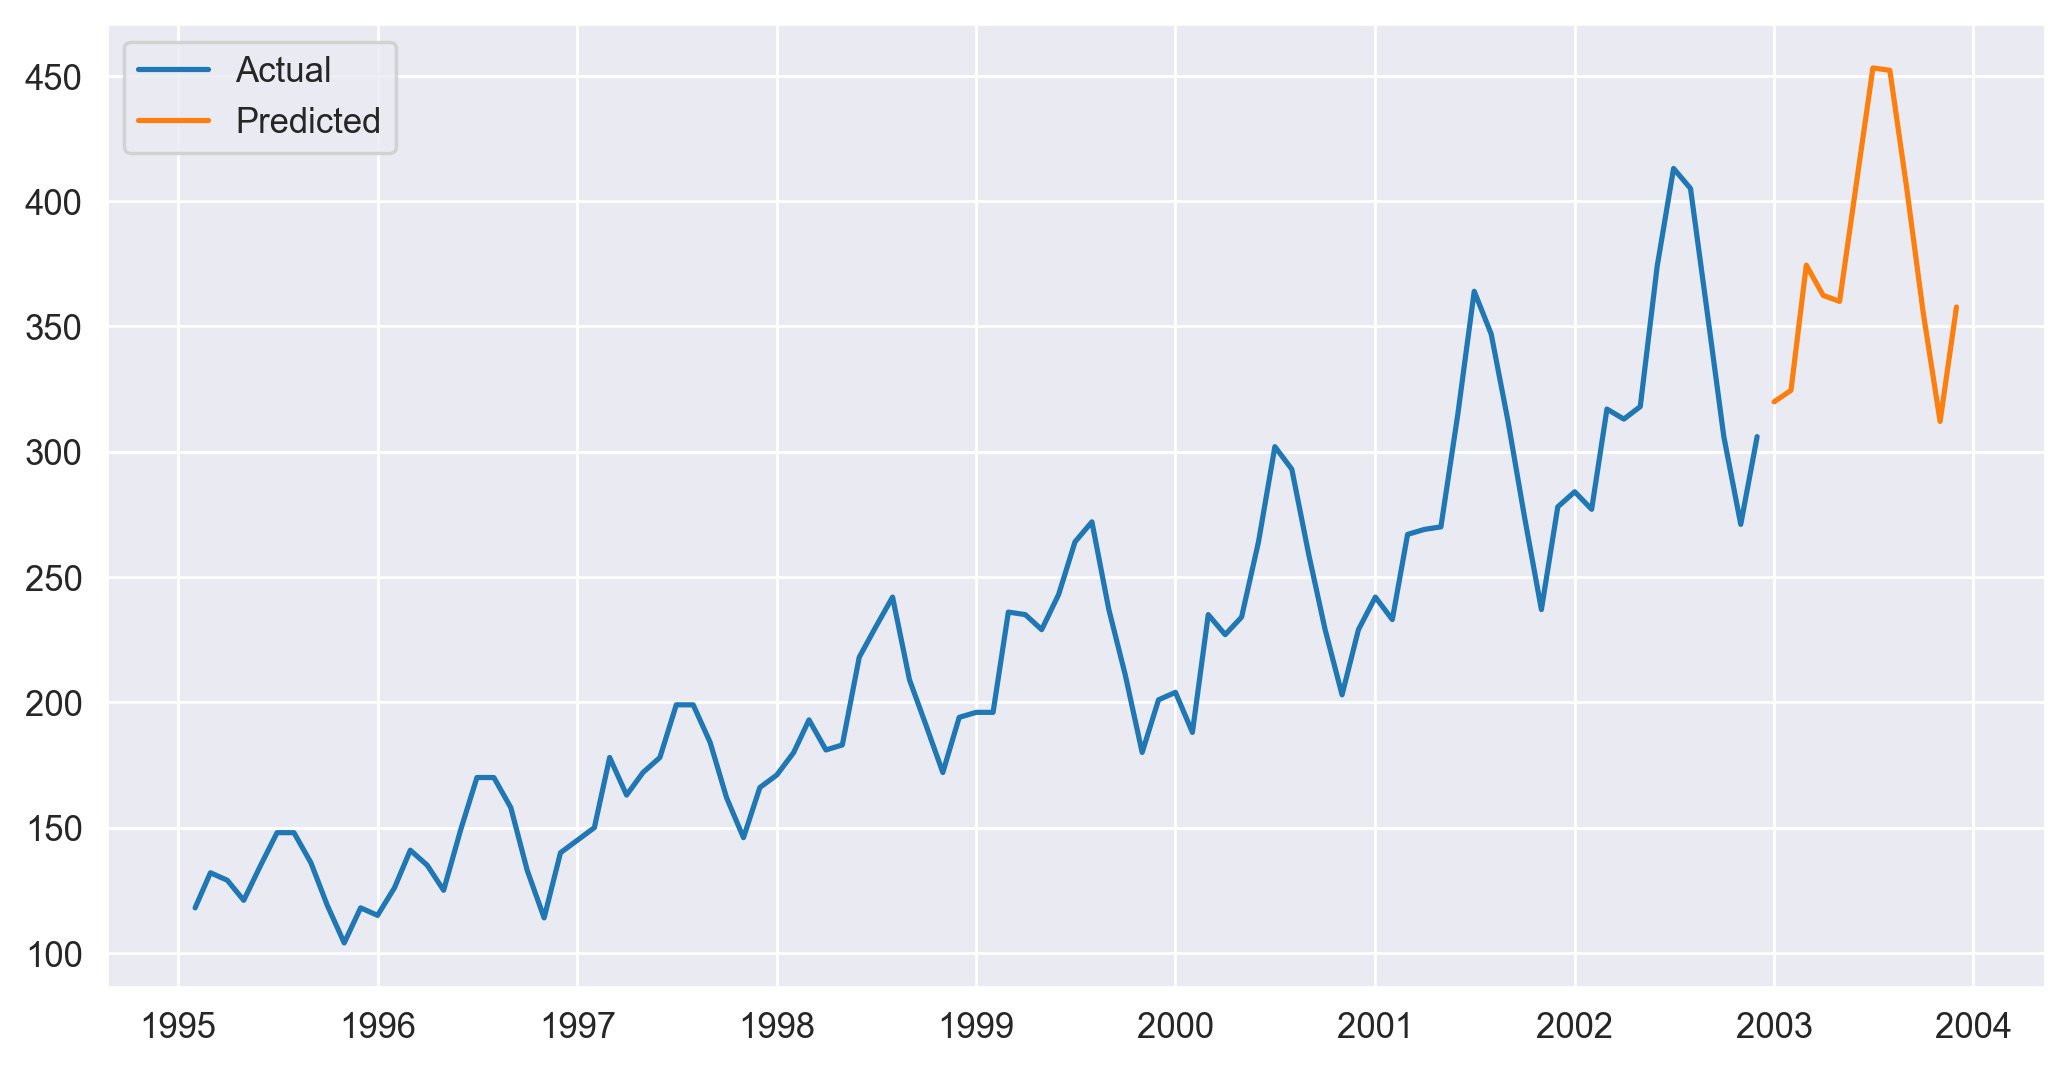

In [78]:
plt.plot(df['Passengers'], label = 'Actual')
plt.plot(np.exp(pred_multi_sea_add_final), label = 'Predicted')
plt.legend();